In [1]:
# DL modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
import keras.backend as K
from tensorflow.keras import initializers
! pip install tensorflow_addons
from tensorflow_addons.layers import SpectralNormalization
from tensorflow.keras.optimizers import Adam

# relevent libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## matplotlib stylings
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
# generator = tf.keras.models.load_model("../Models/CGAN/finalmodel_weights_epoch_951.h5")
# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# random_noise = tf.random.normal(shape=(10, 128))
# class_label = keras.utils.to_categorical([0], 10)
# class_label = tf.cast(class_label, tf.float32)
# class_label = tf.repeat(class_label, repeats=10, axis=0)
# noise_and_label = tf.concat([random_noise, class_label], axis=1)
# fake_images = generator(noise_and_label)
# fake_images = tf.image.convert_image_dtype(fake_images, dtype=tf.float32, saturate=True)
# fig, axs = plt.subplots(1, 10, figsize=(10, 1))
# for j in range(10):
#     axs[j].imshow(fake_images[j])
#     axs[j].set_title(labels[j])
#     axs[j].axis("off")
# plt.show()

In [3]:
batch_size = 128
num_channels = 3
num_classes = 10
image_size = 32
latent_dim = 128

In [4]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

138 13


In [ ]:
# generator = tf.keras.models.load_model('../Models/CGAN/final_SNCGAN_MODEL.h5')
# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# for i in range(10):
#     random_noise = tf.random.normal(shape=(100, 128))
#     class_label = keras.utils.to_categorical([i], 10)
#     class_label = tf.cast(class_label, tf.float32)
#     class_label = tf.repeat(class_label, repeats=10, axis=0)
#     noise_and_label = tf.concat([random_noise, class_label], axis=1)
#     fake_images = generator(noise_and_label)
#     fake_images = tf.image.convert_image_dtype(fake_images, dtype=tf.float32, saturate=True)
#     fig, axs = plt.subplots(1, 10, figsize=(10, 1))
#     for j in range(100):
#         axs[j].imshow(fake_images[j])
#         axs[j].set_title(labels[j])
#         axs[j].axis("off")
#     plt.savefig("./GenImages/{}_images.png".format(labels[i]))


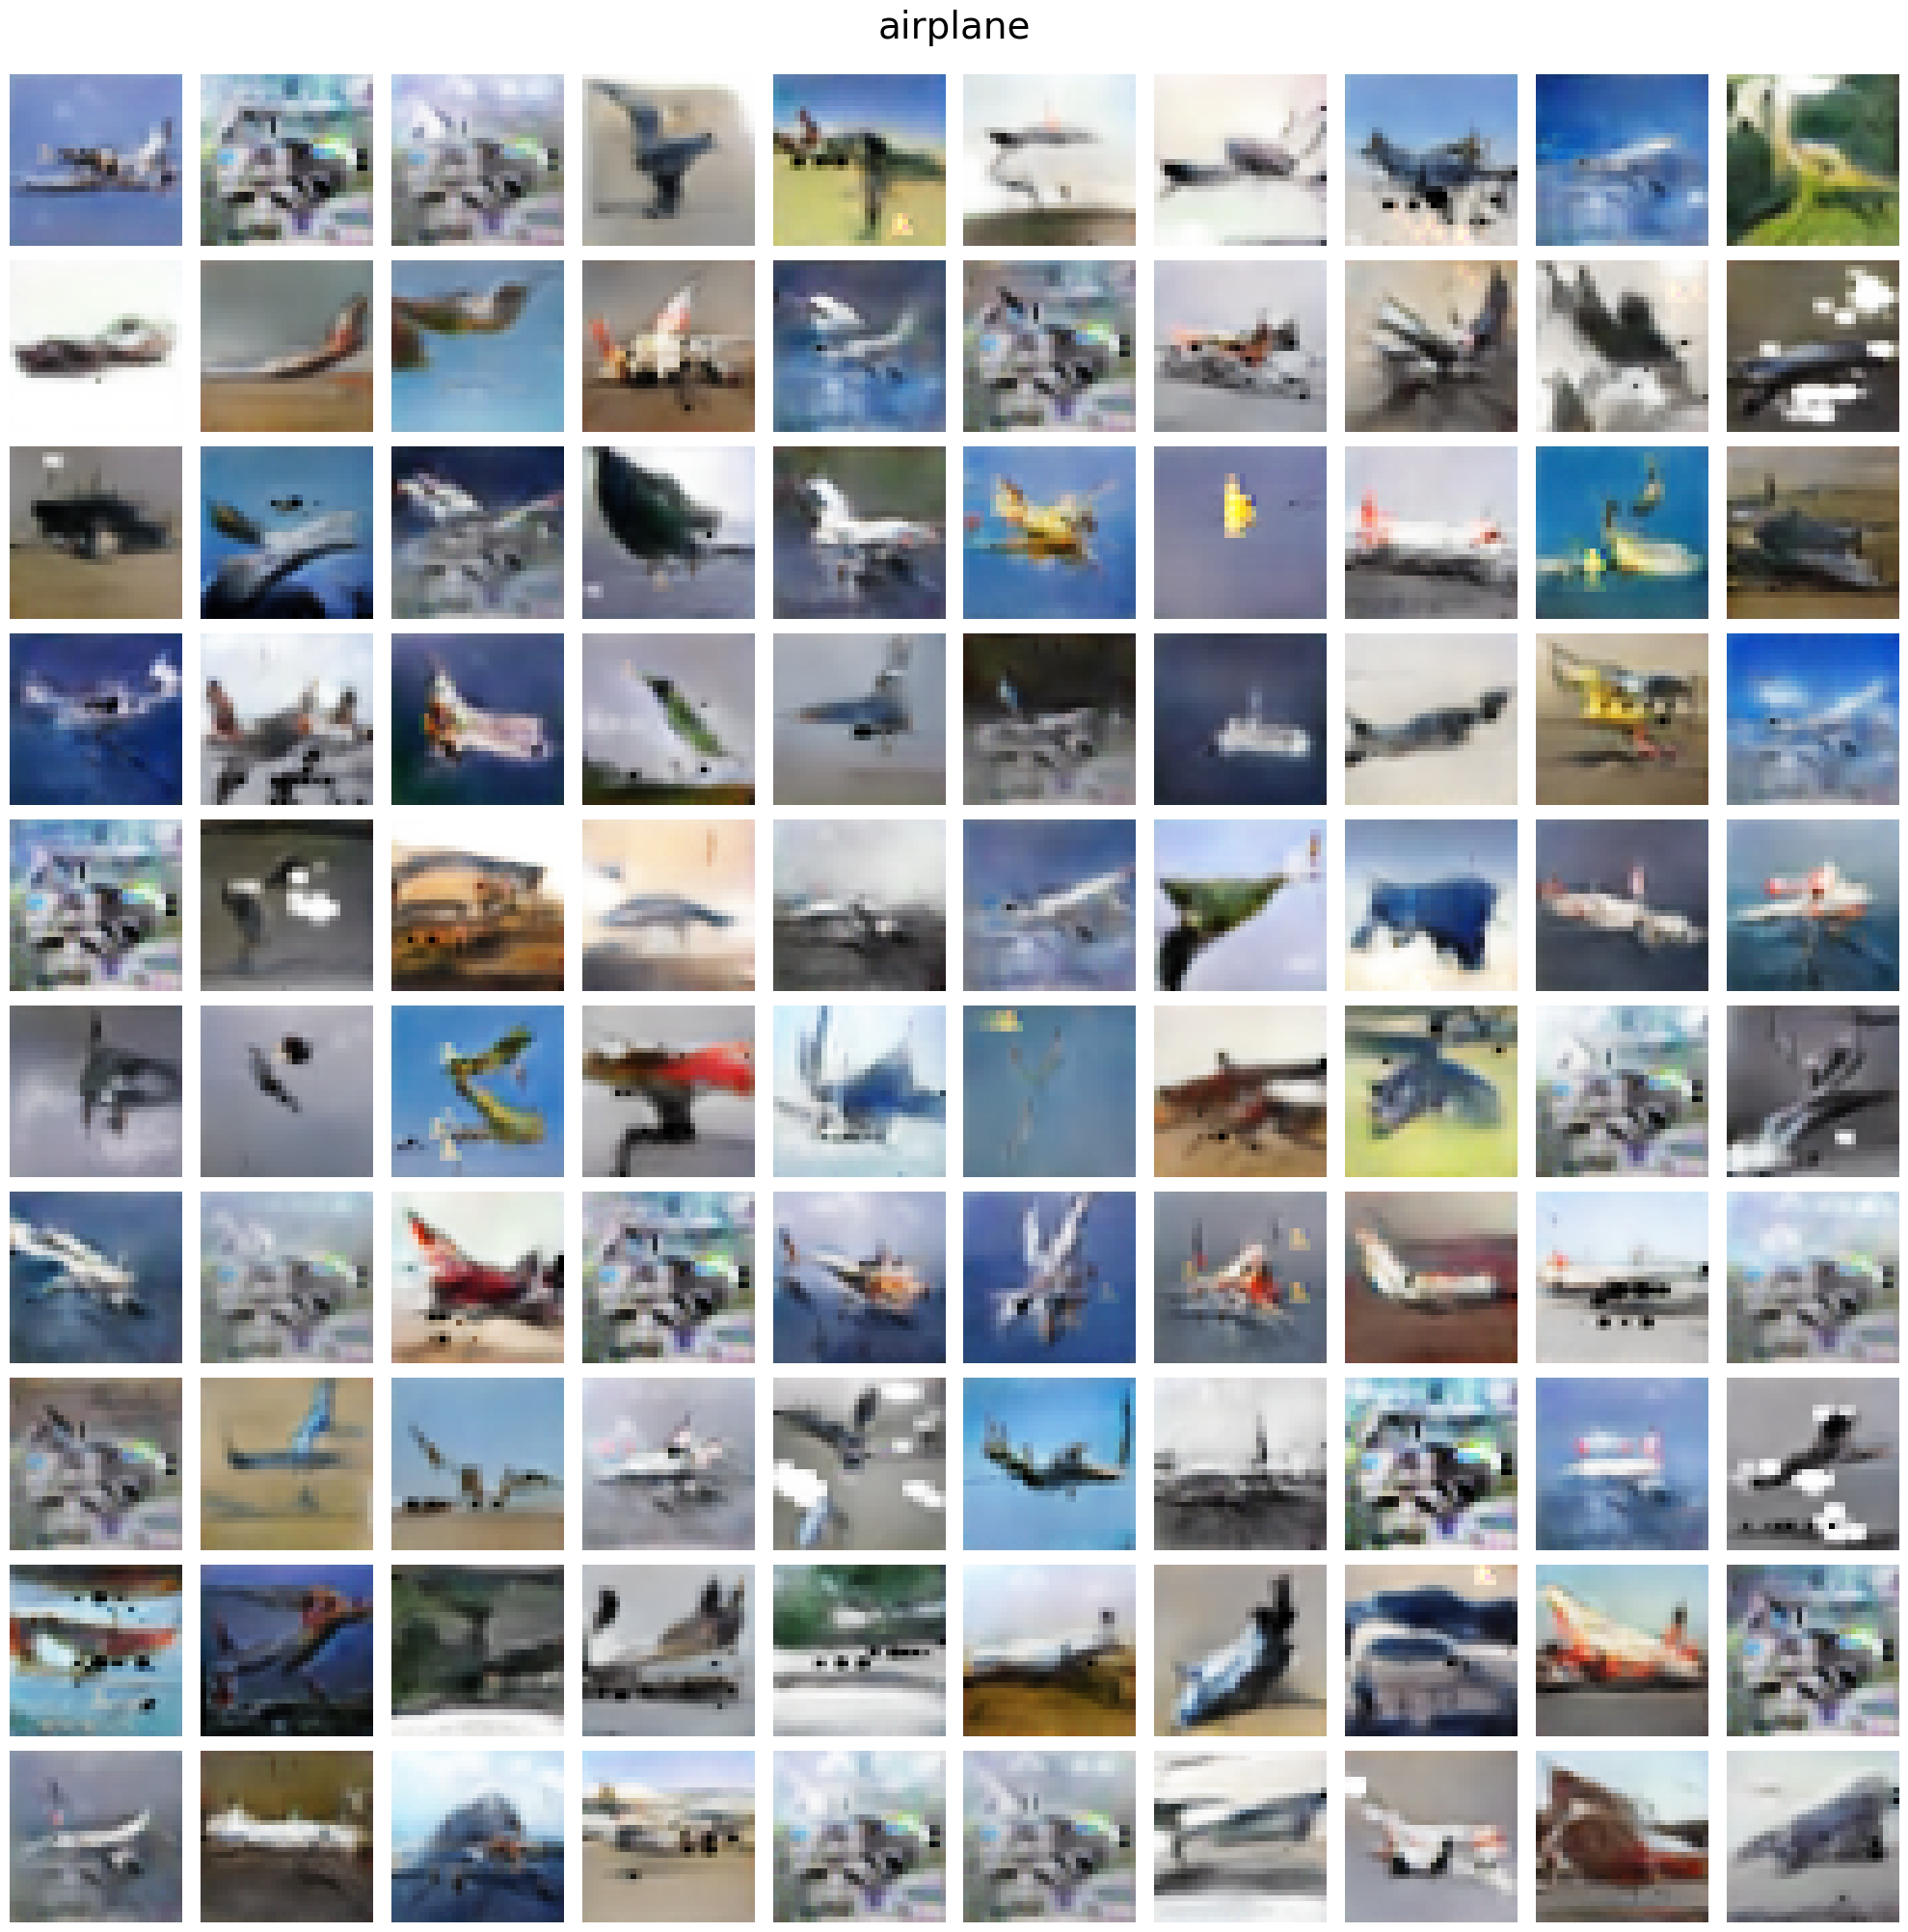

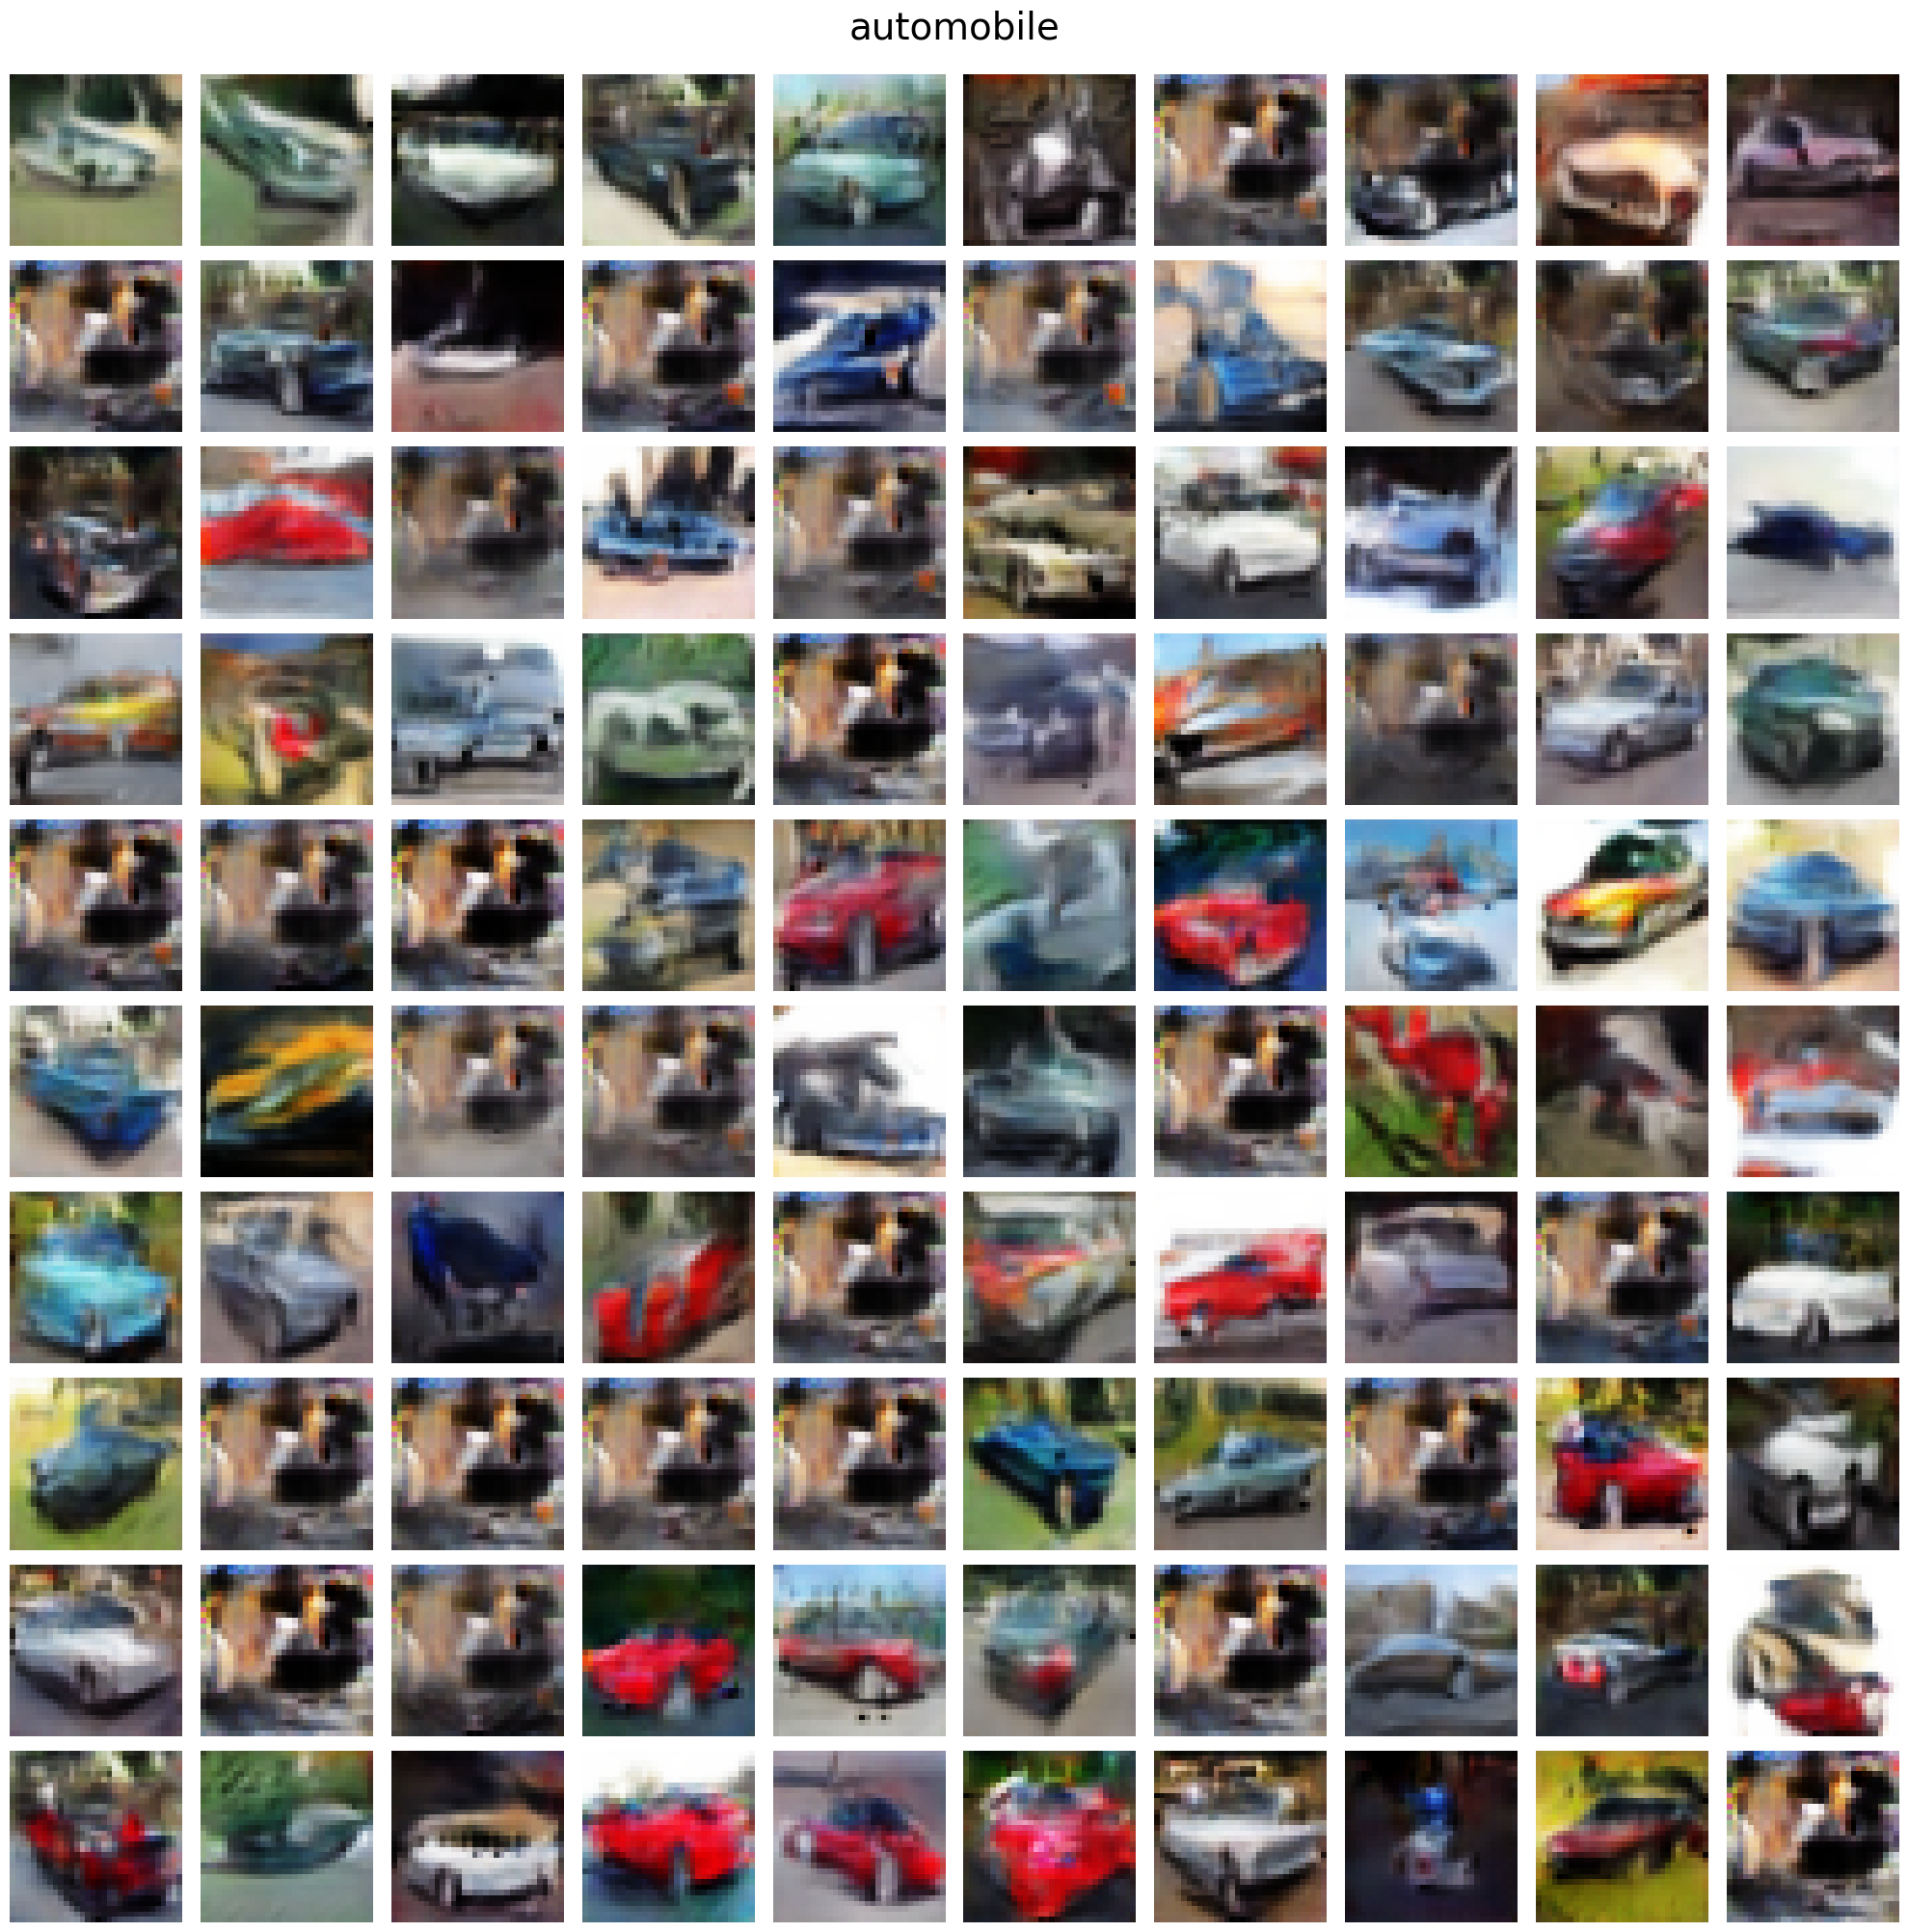

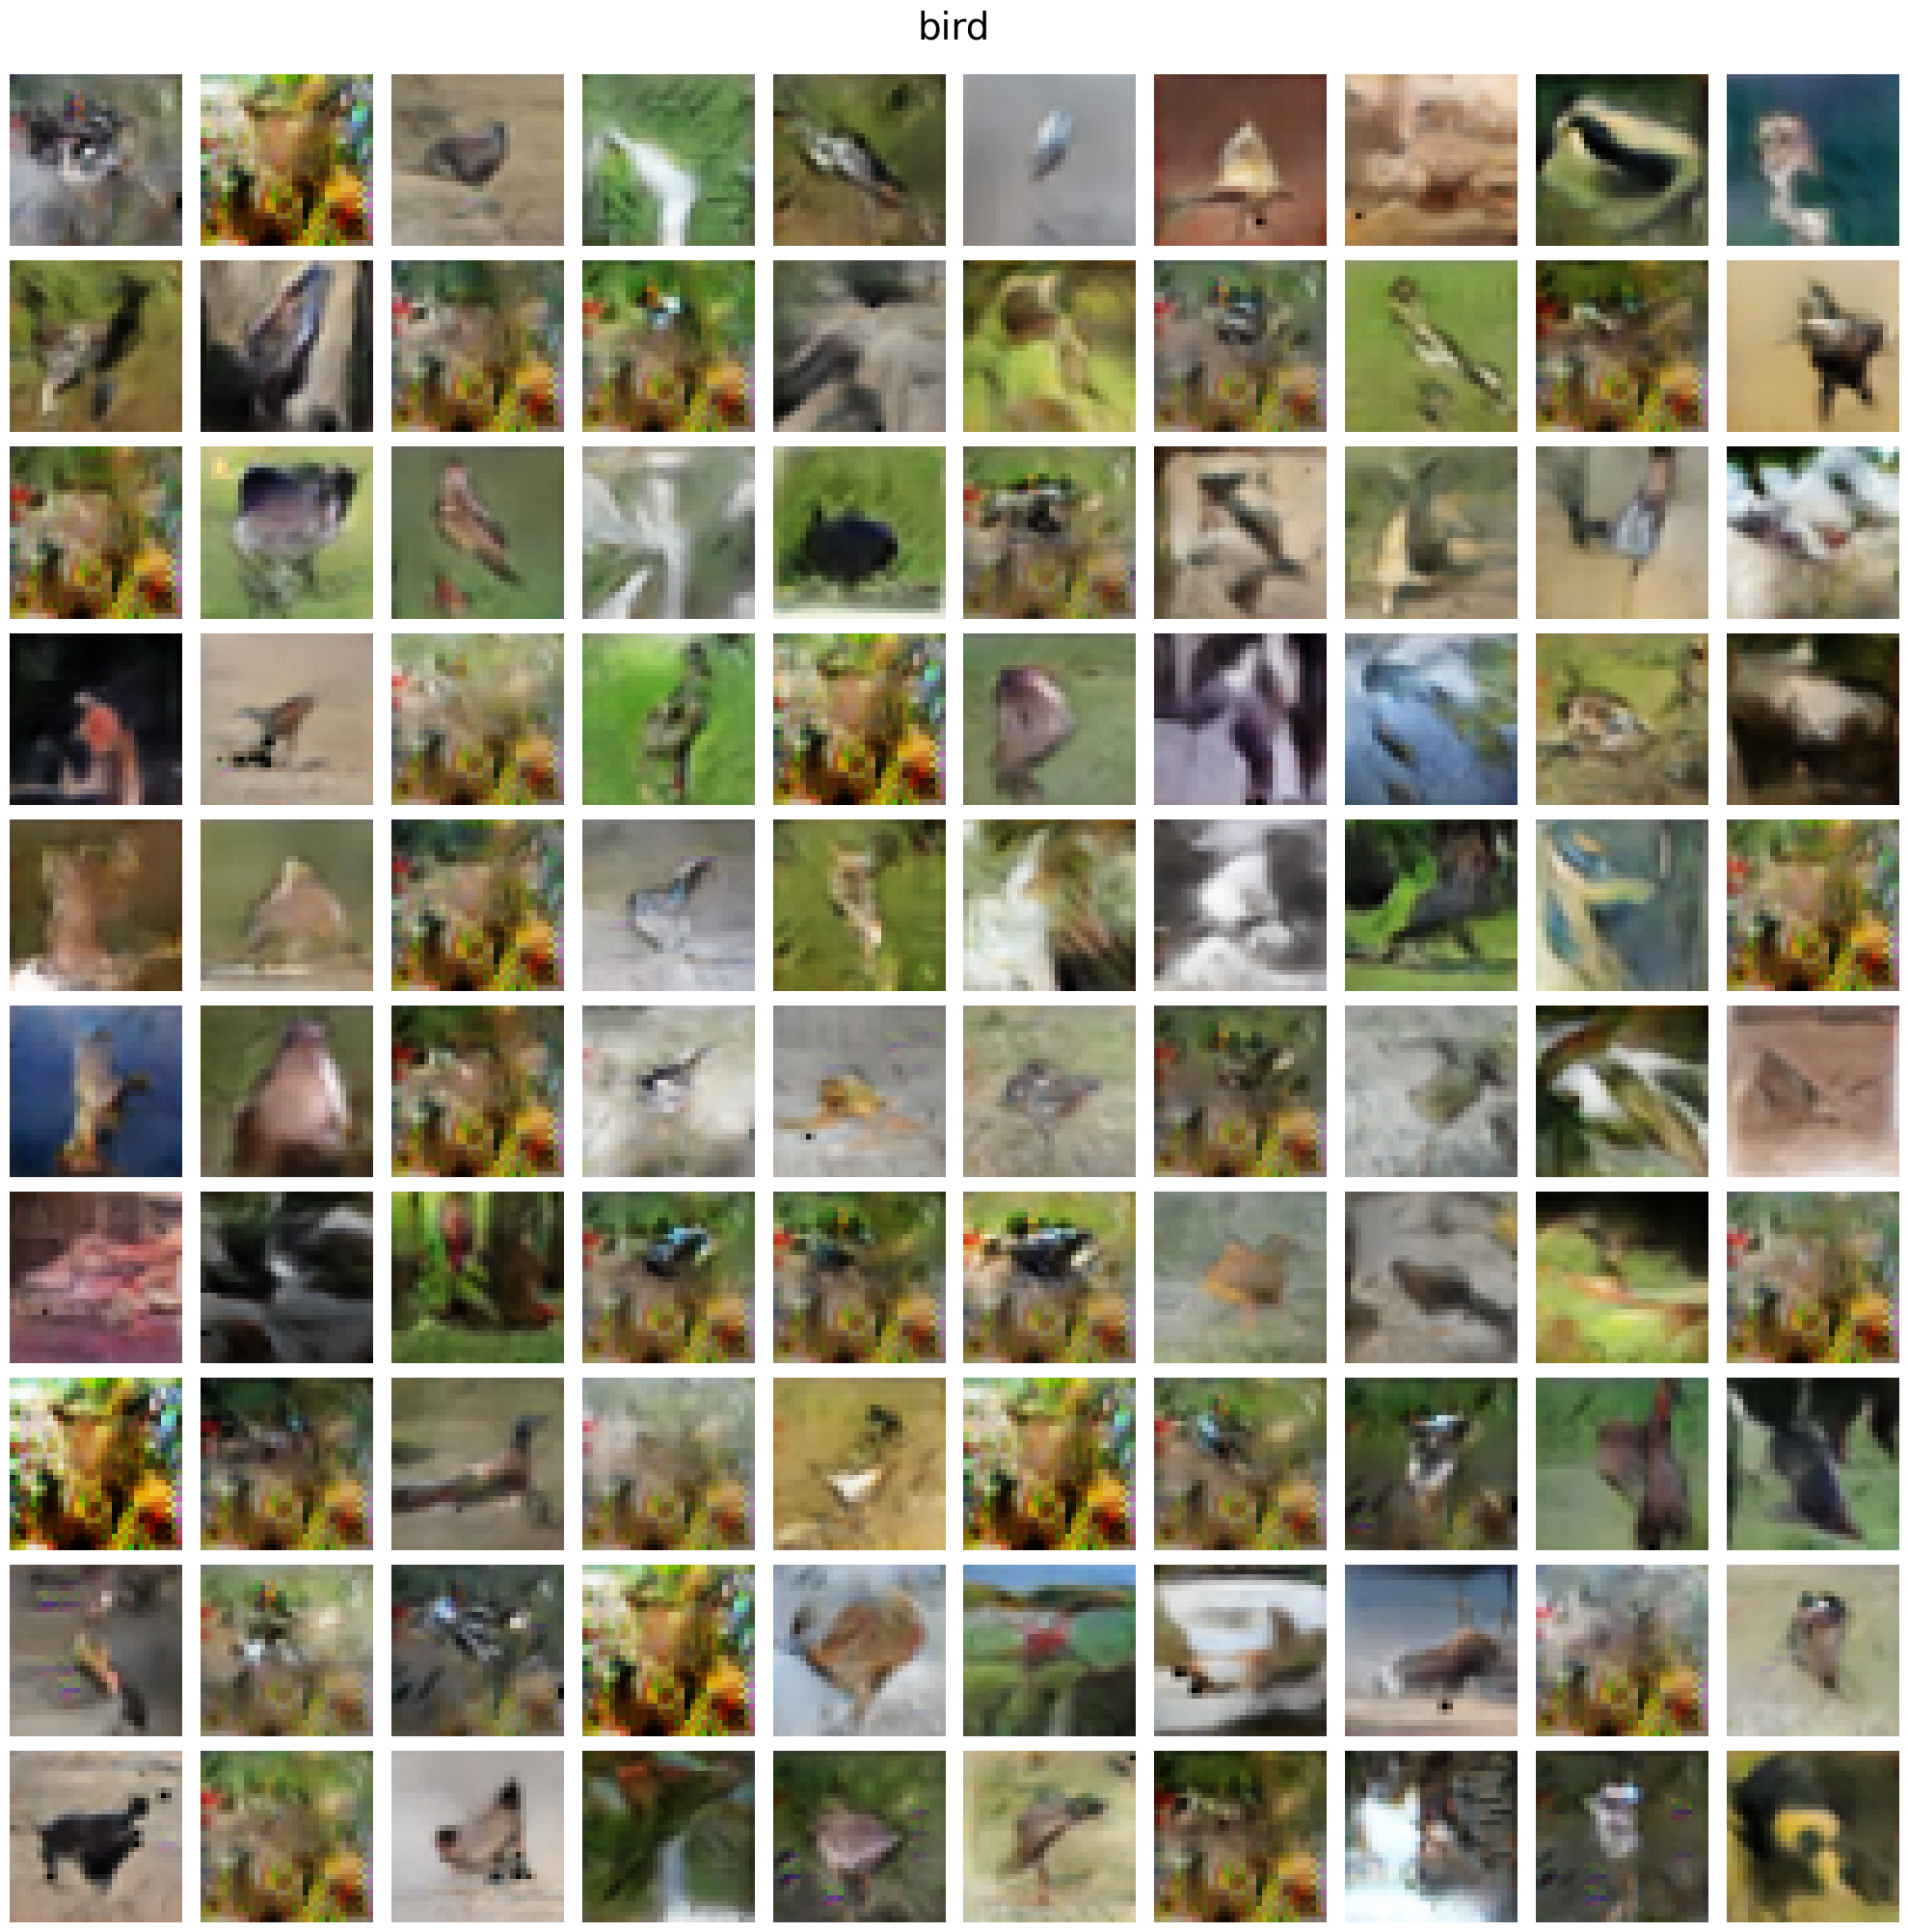

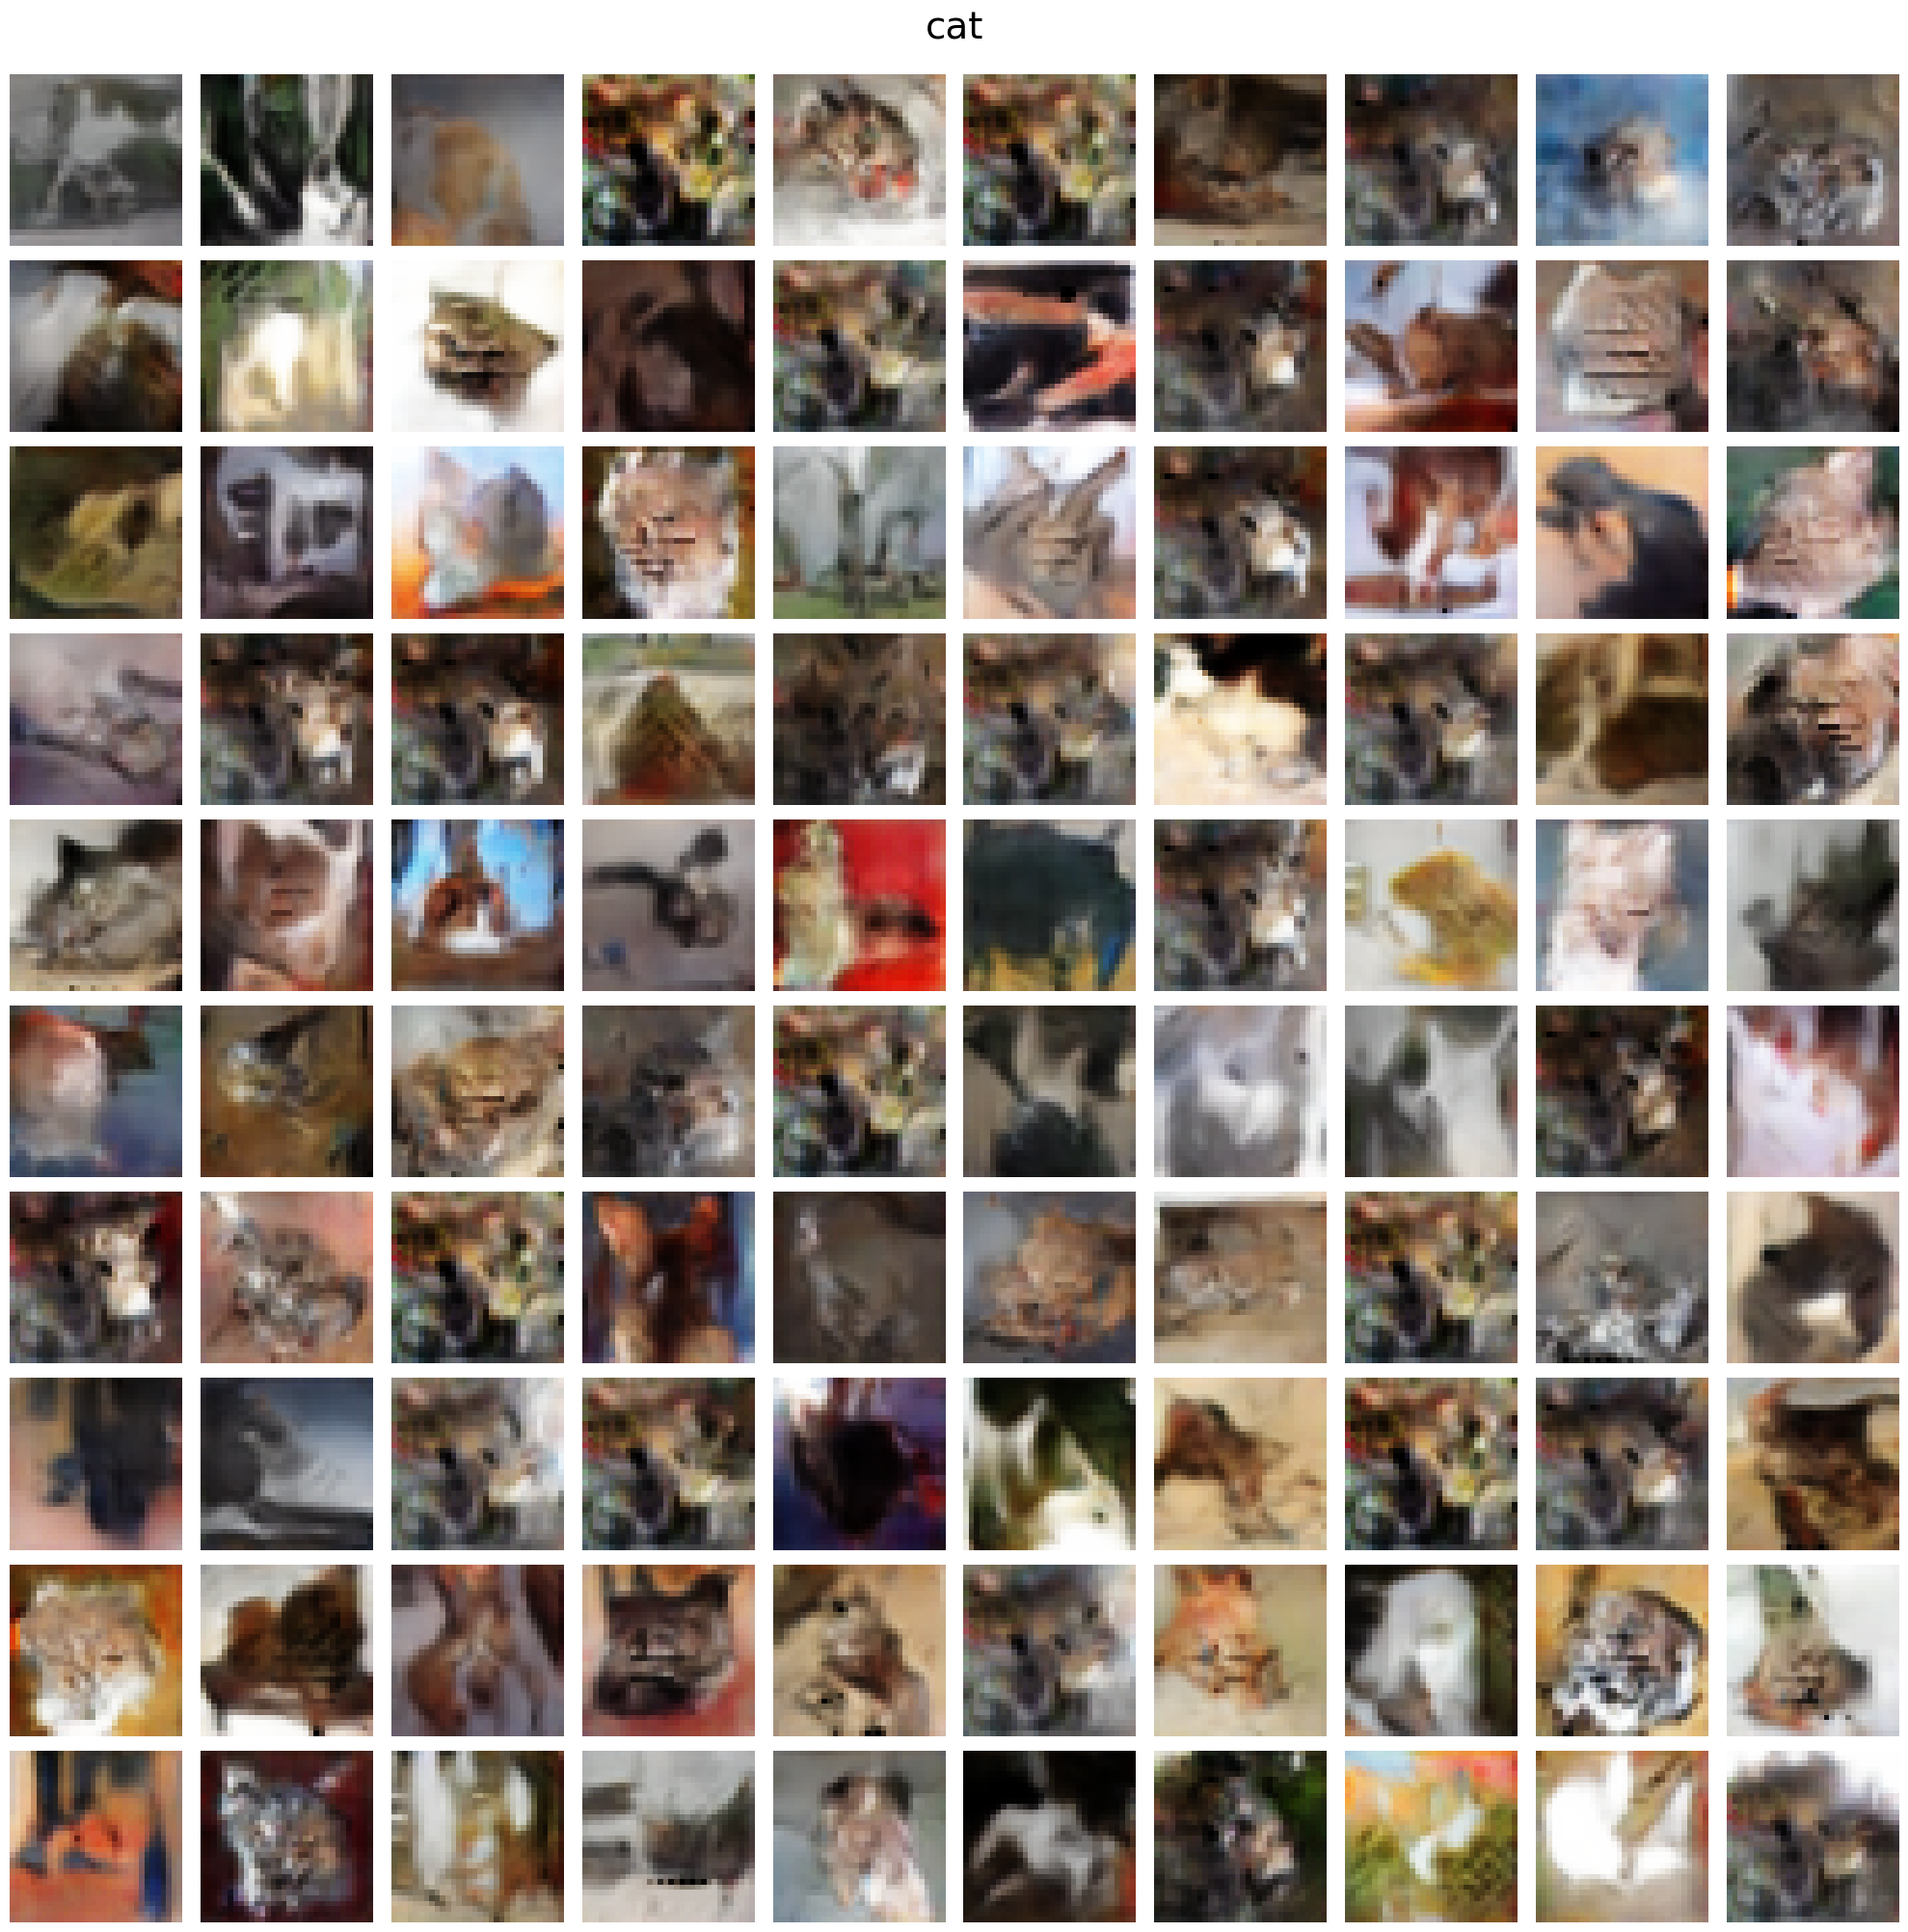

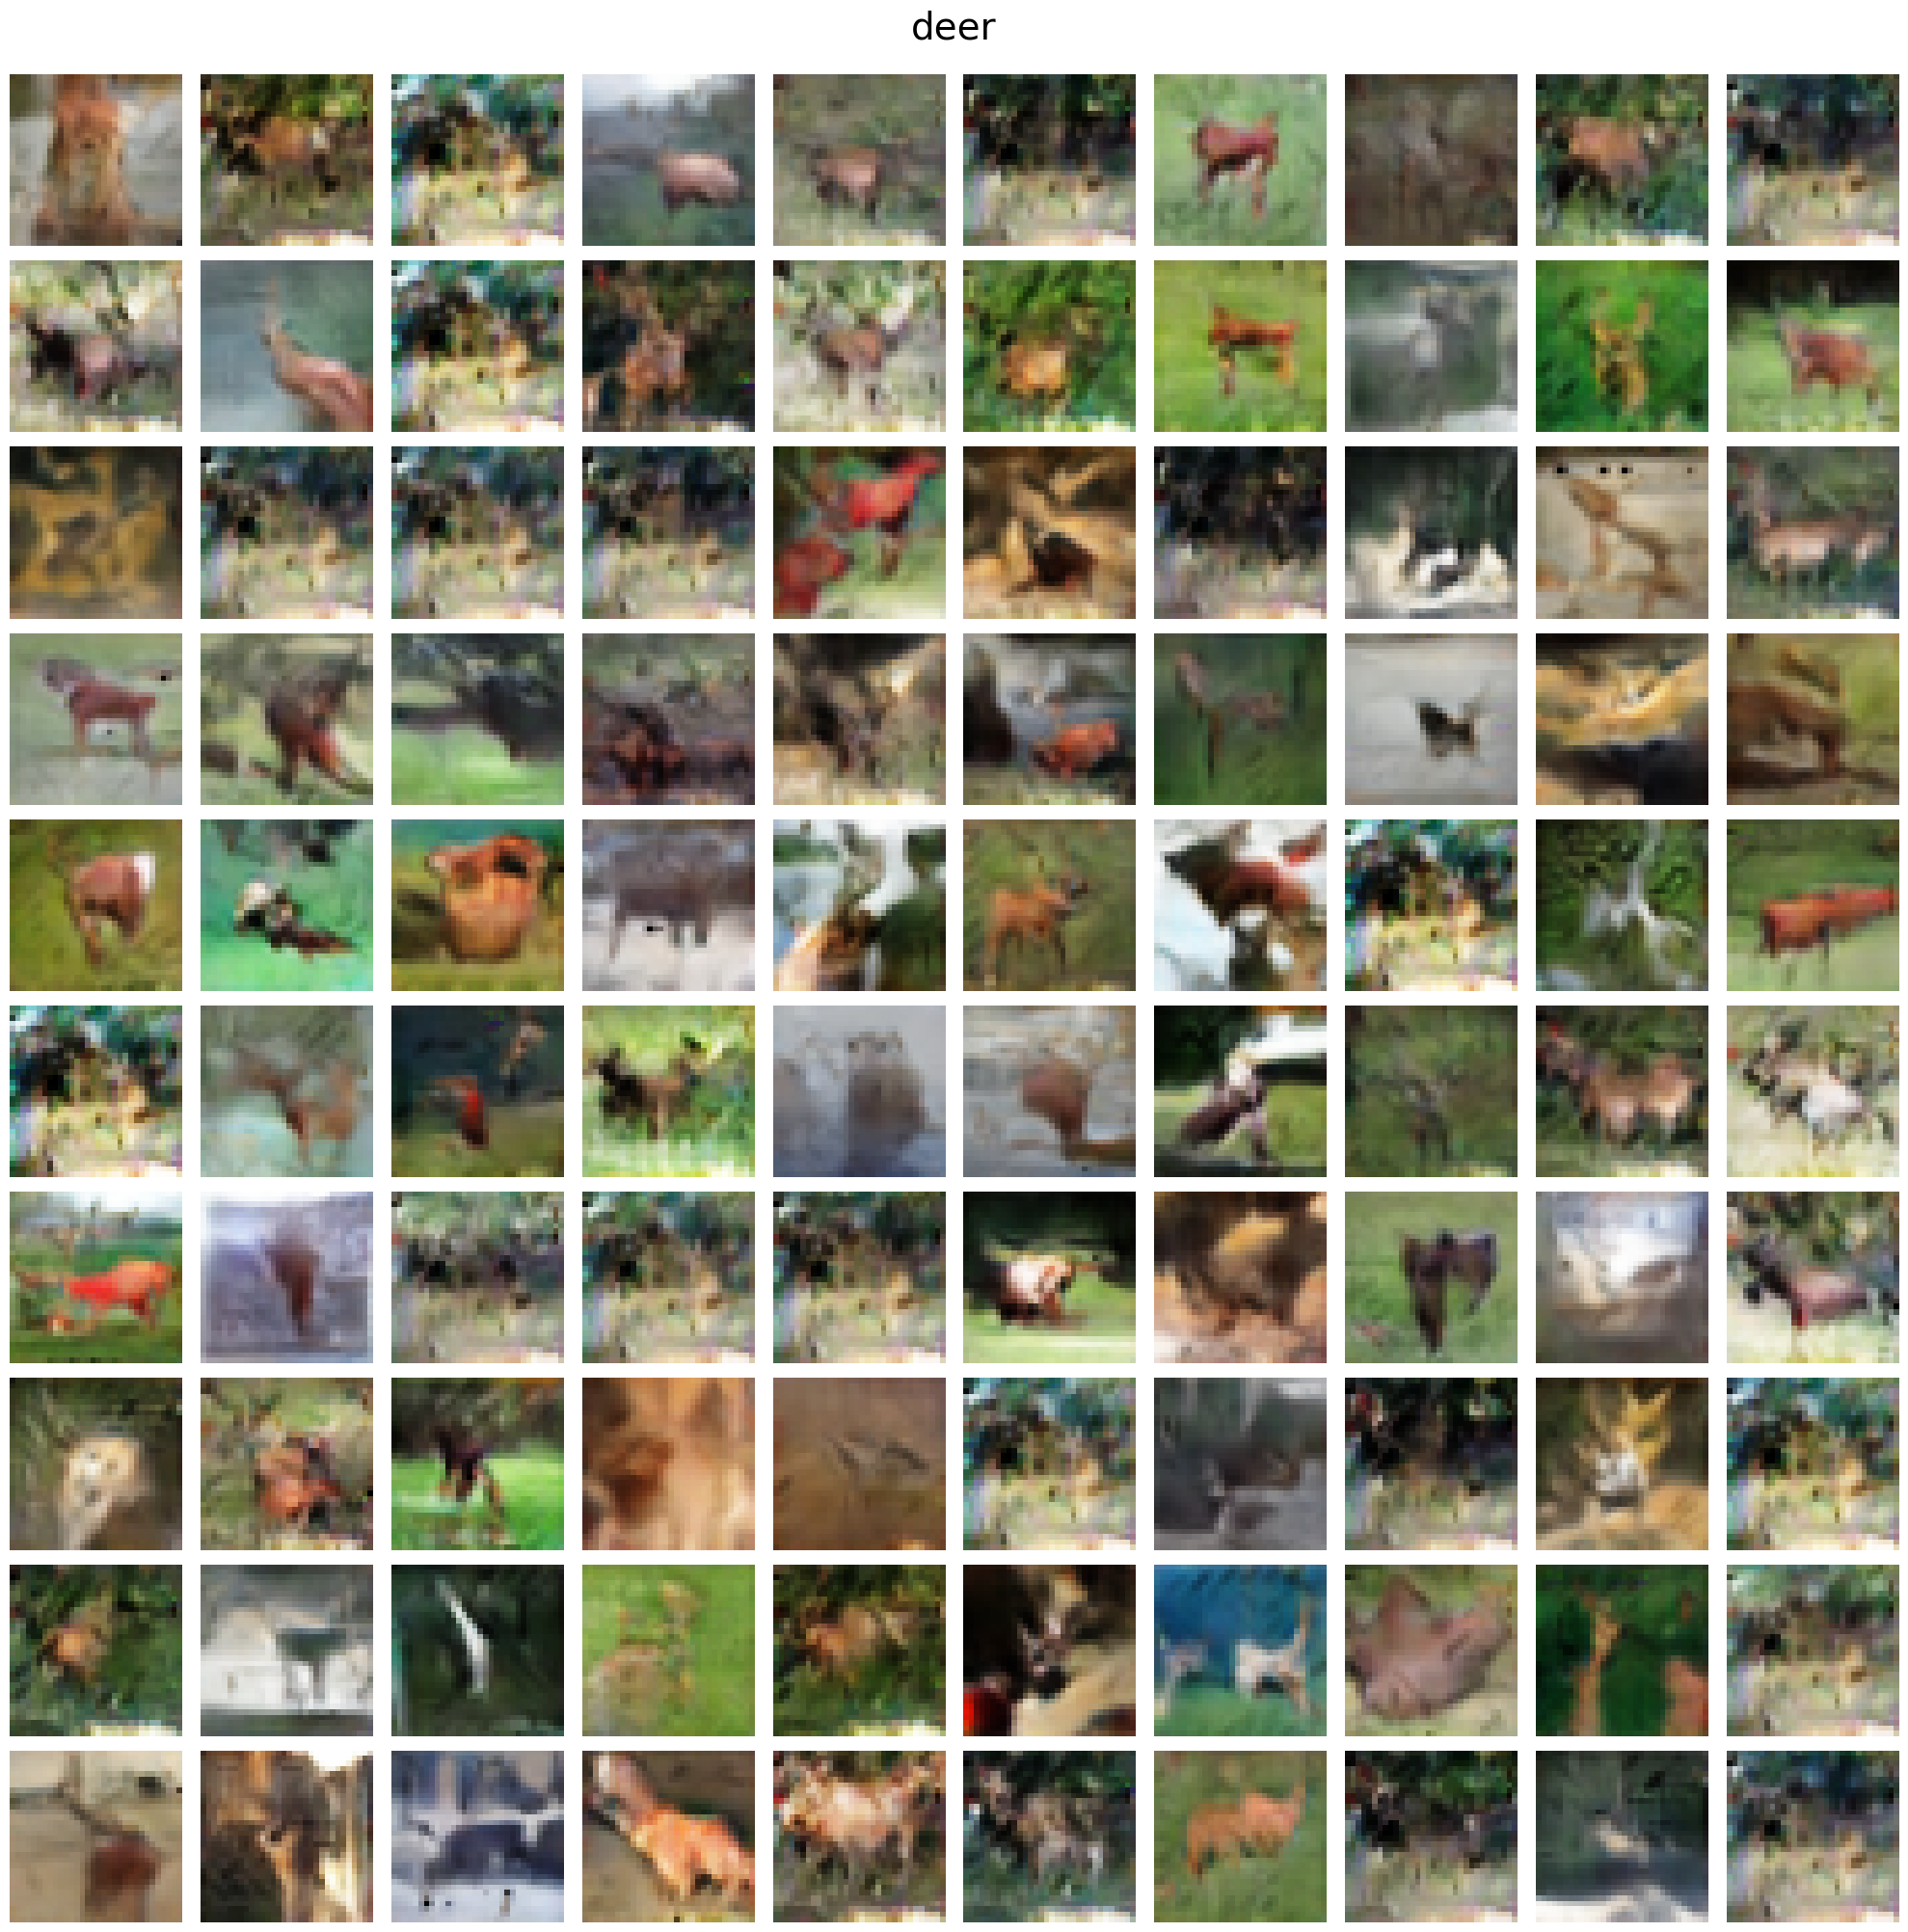

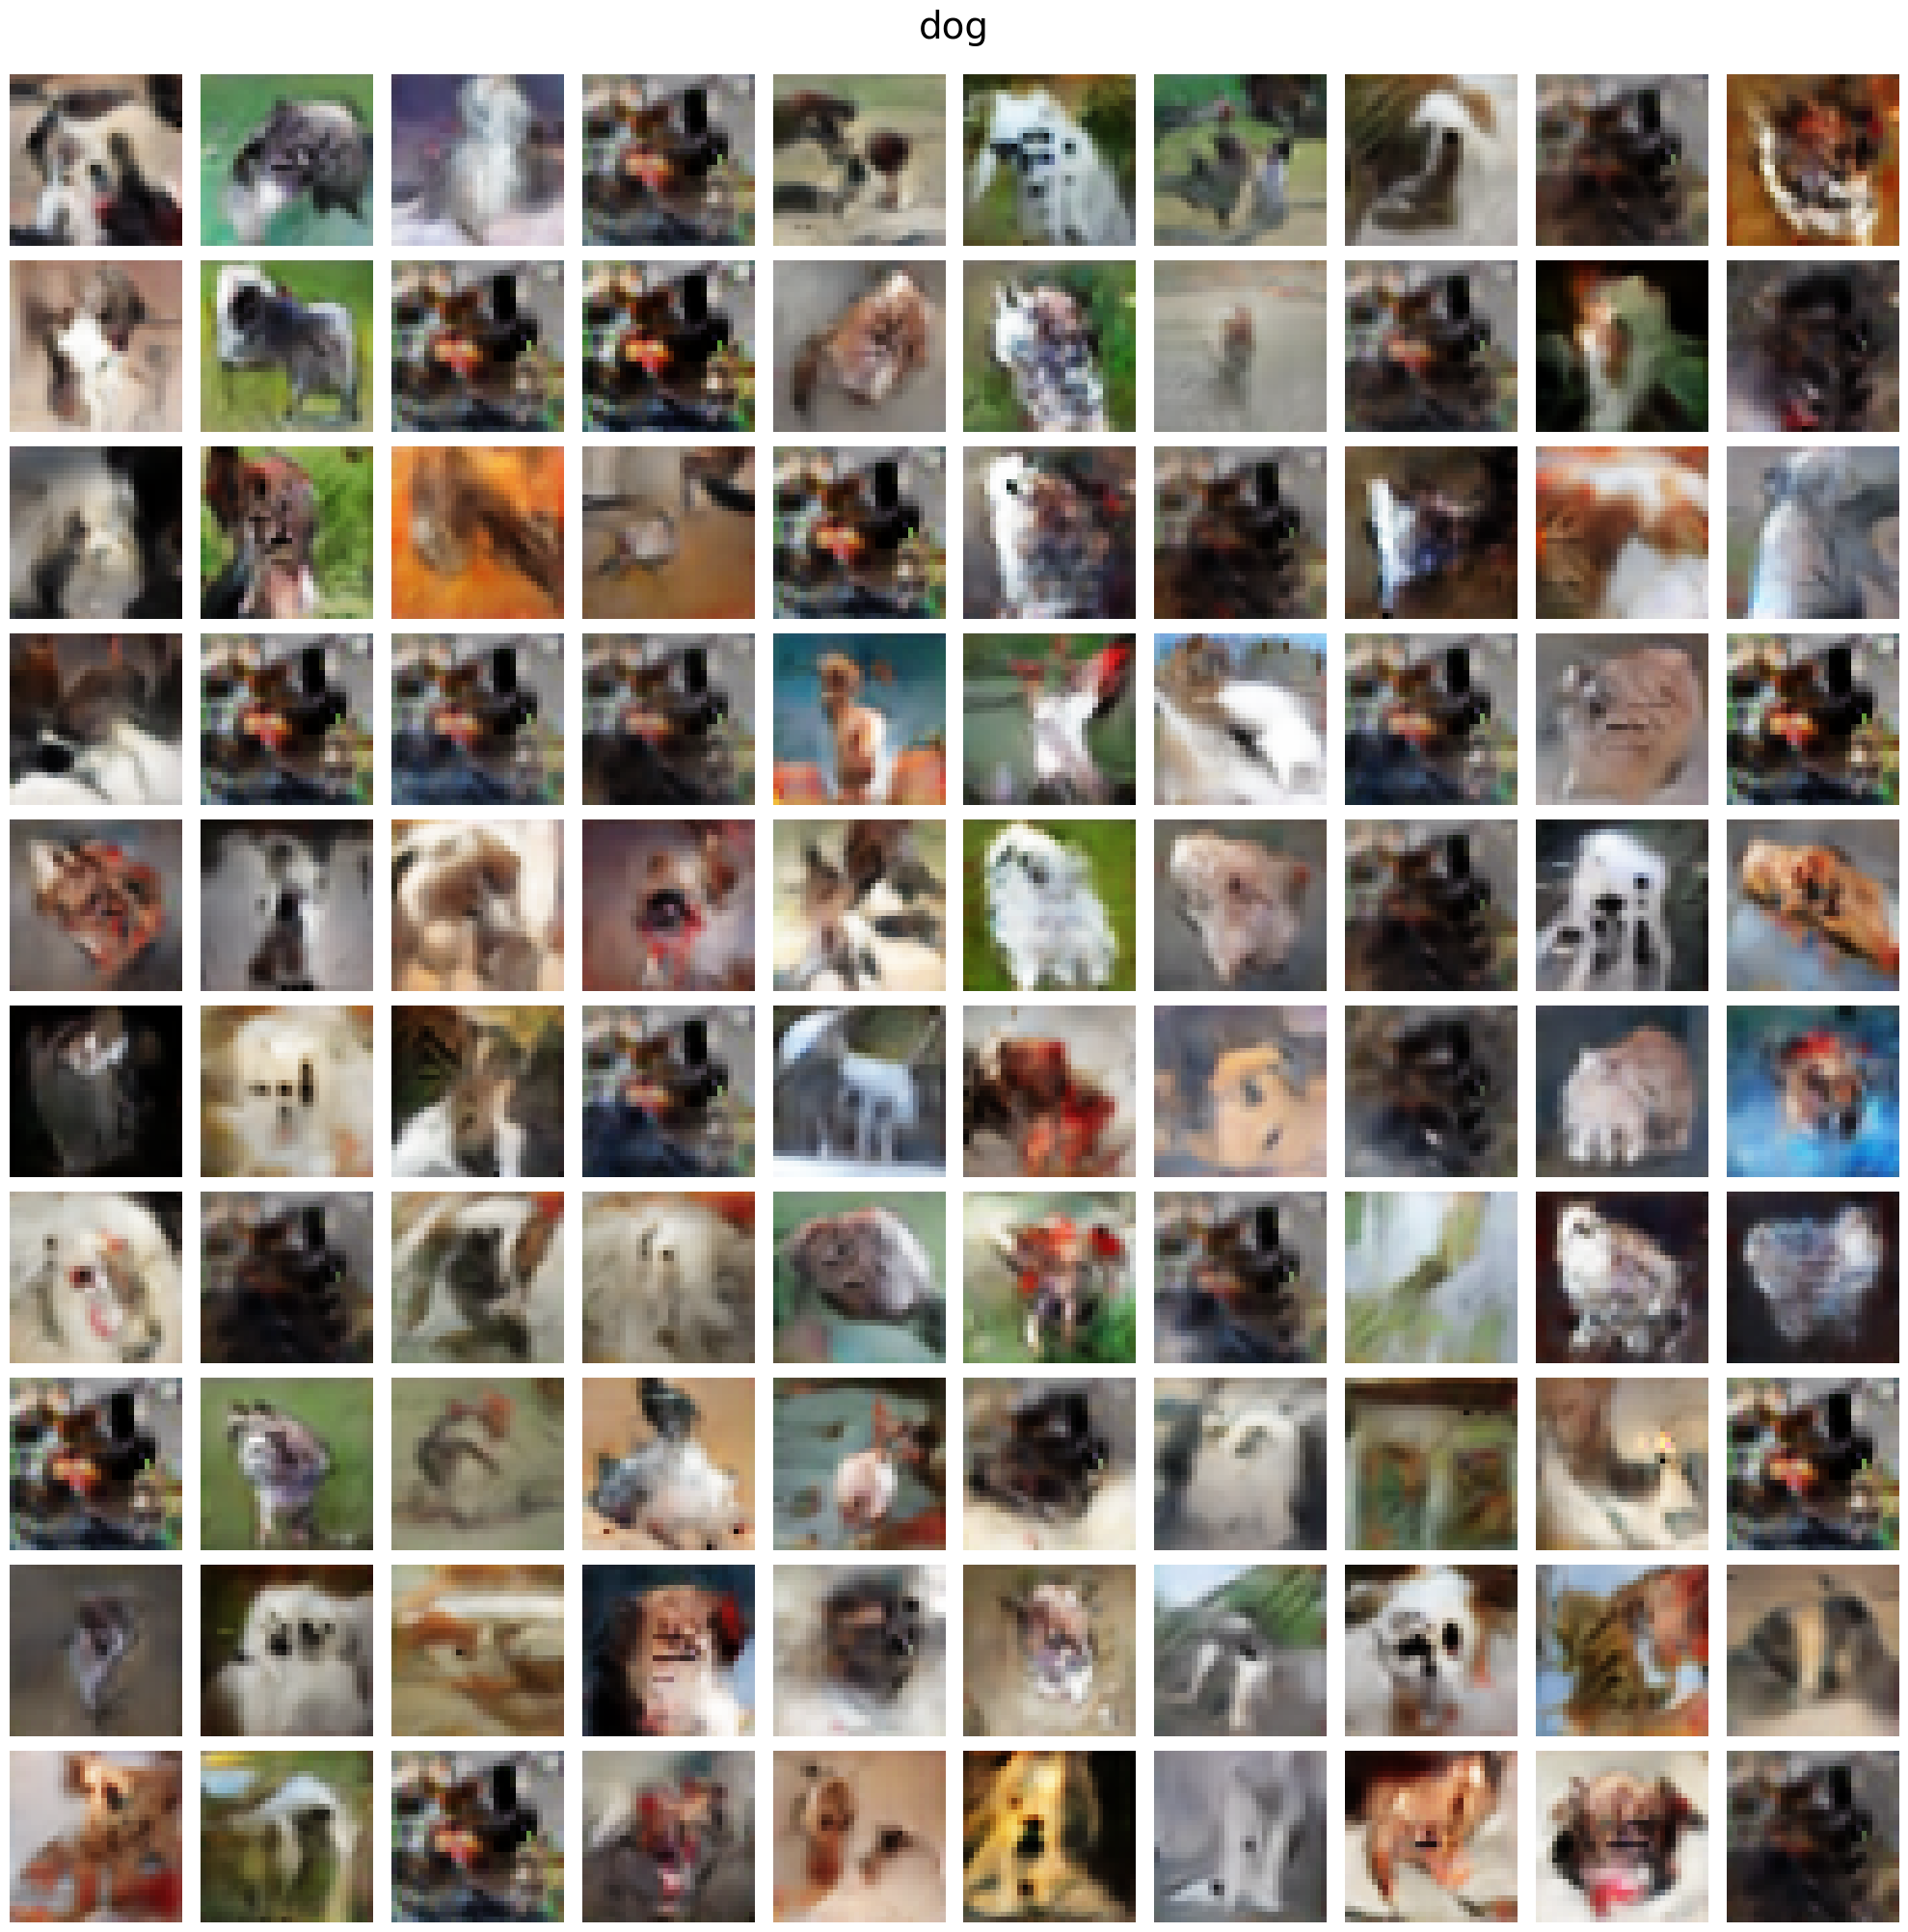

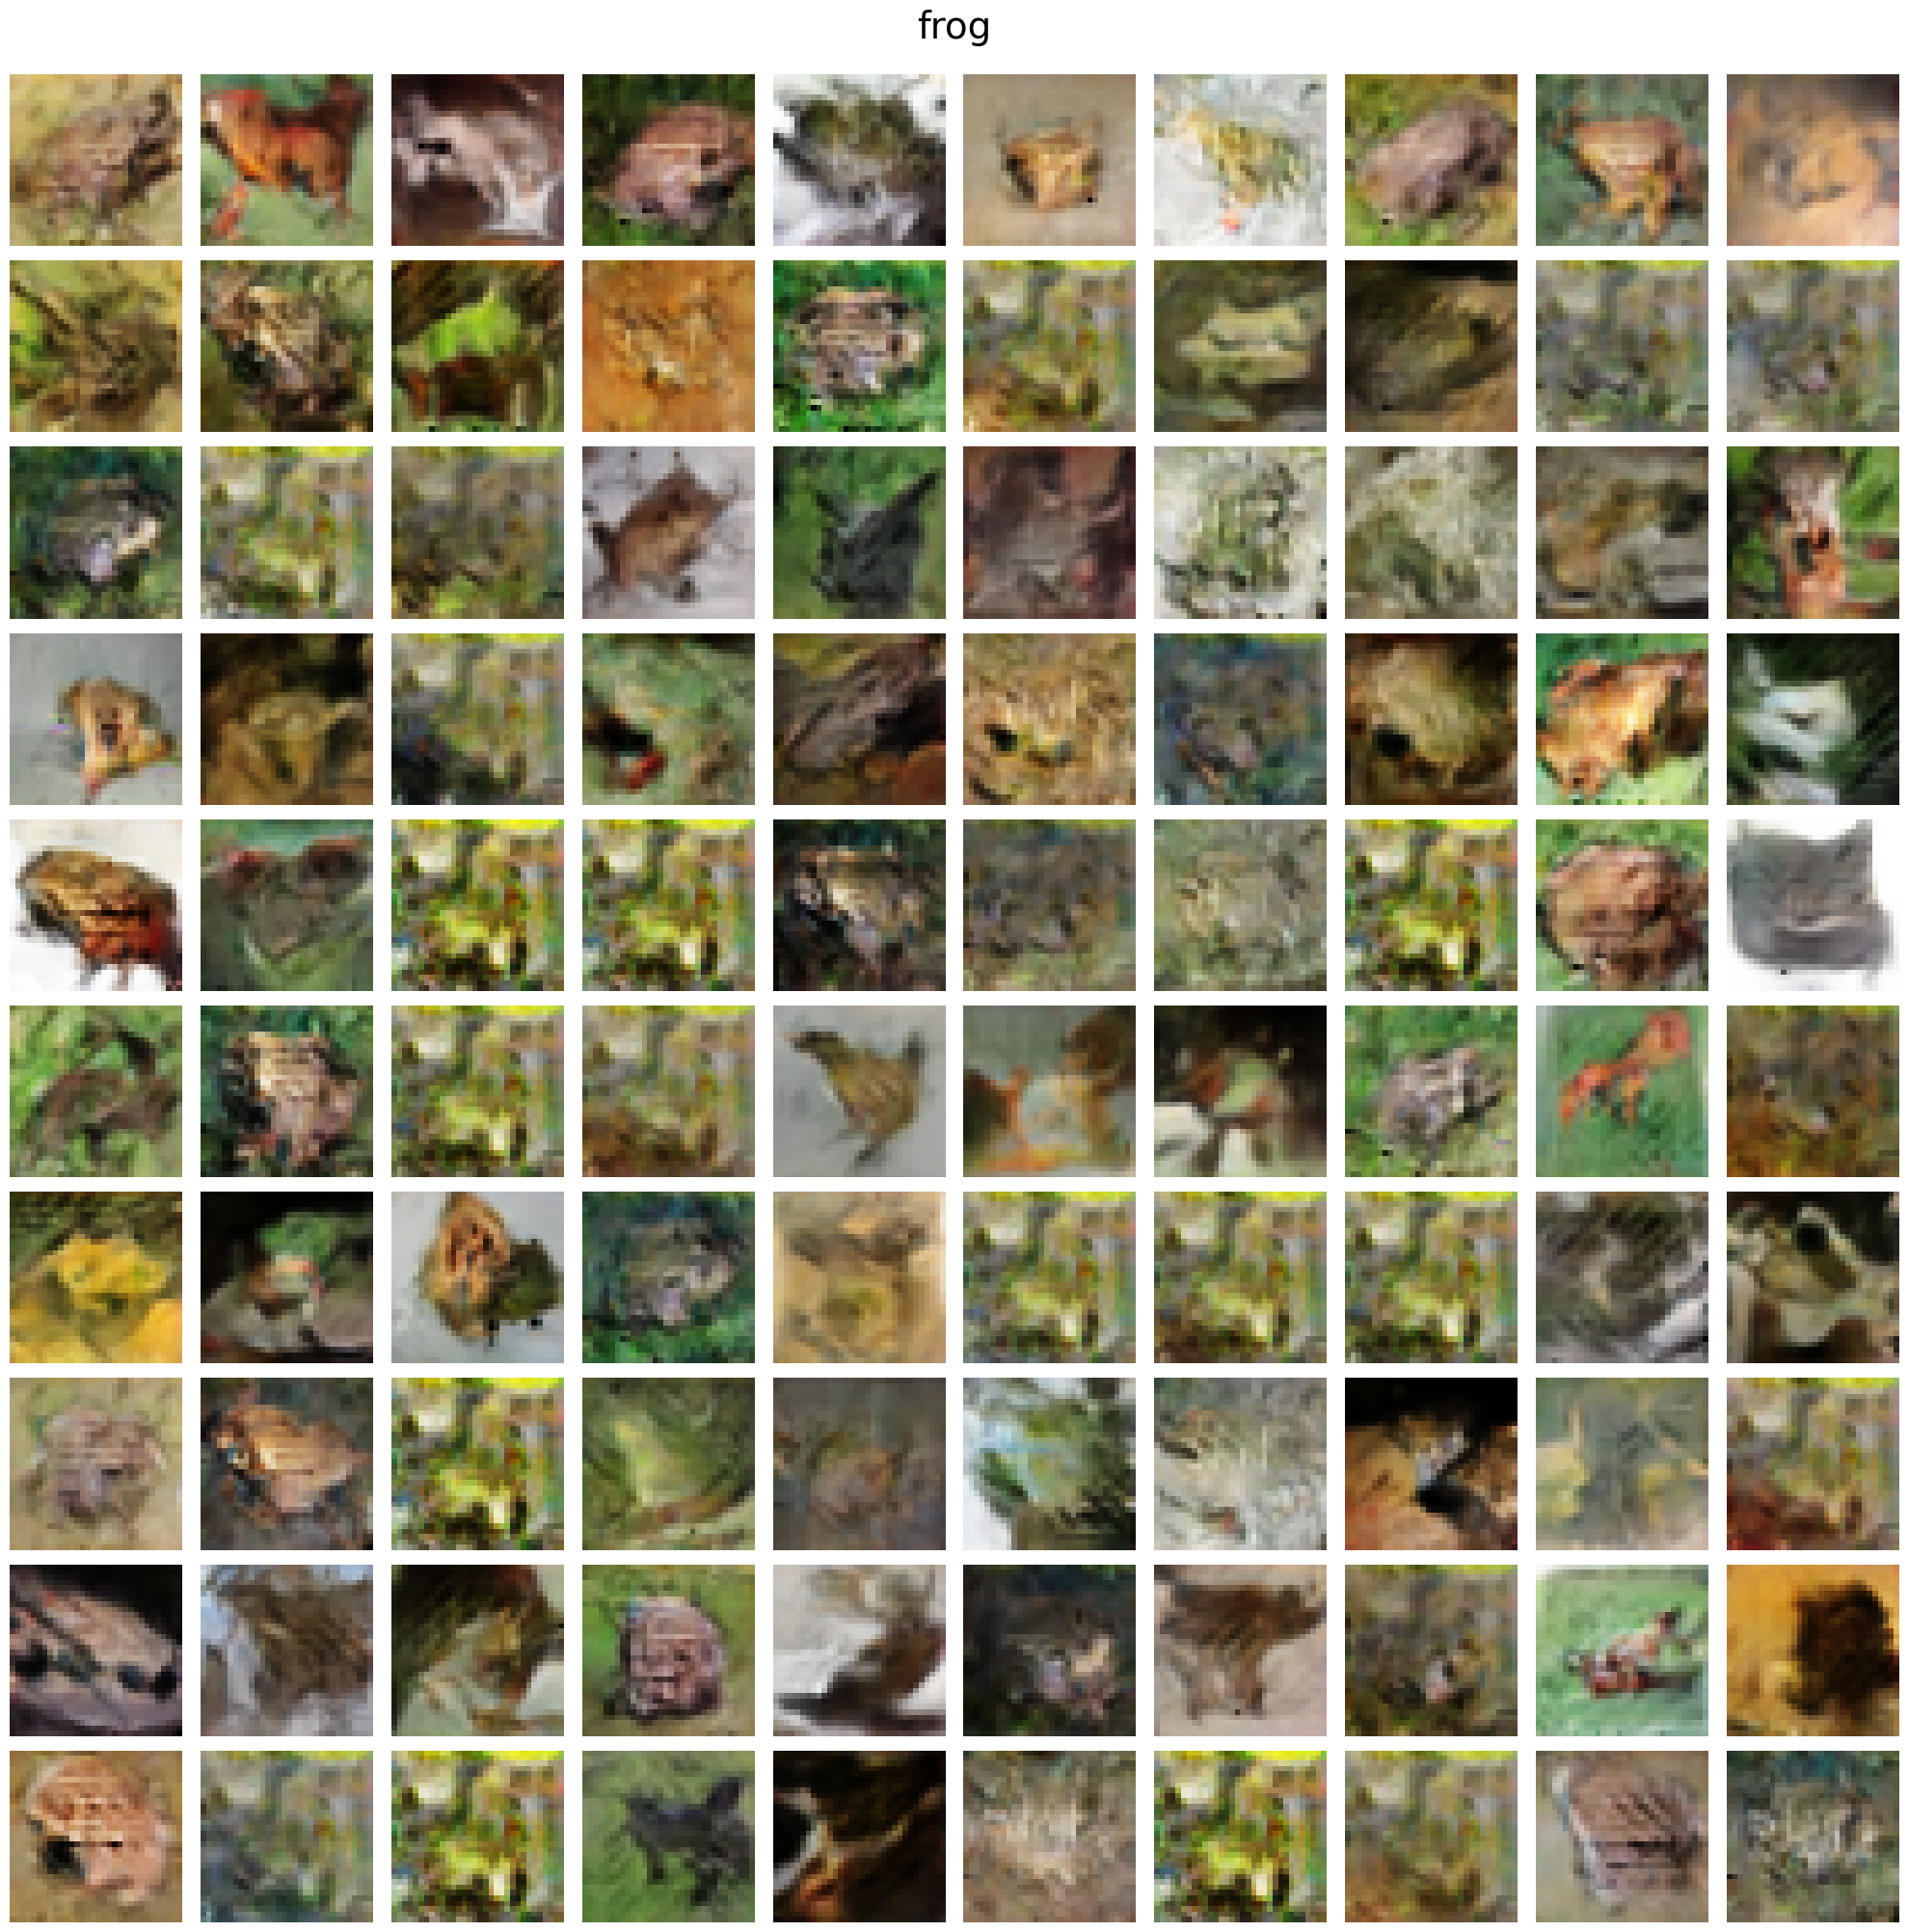

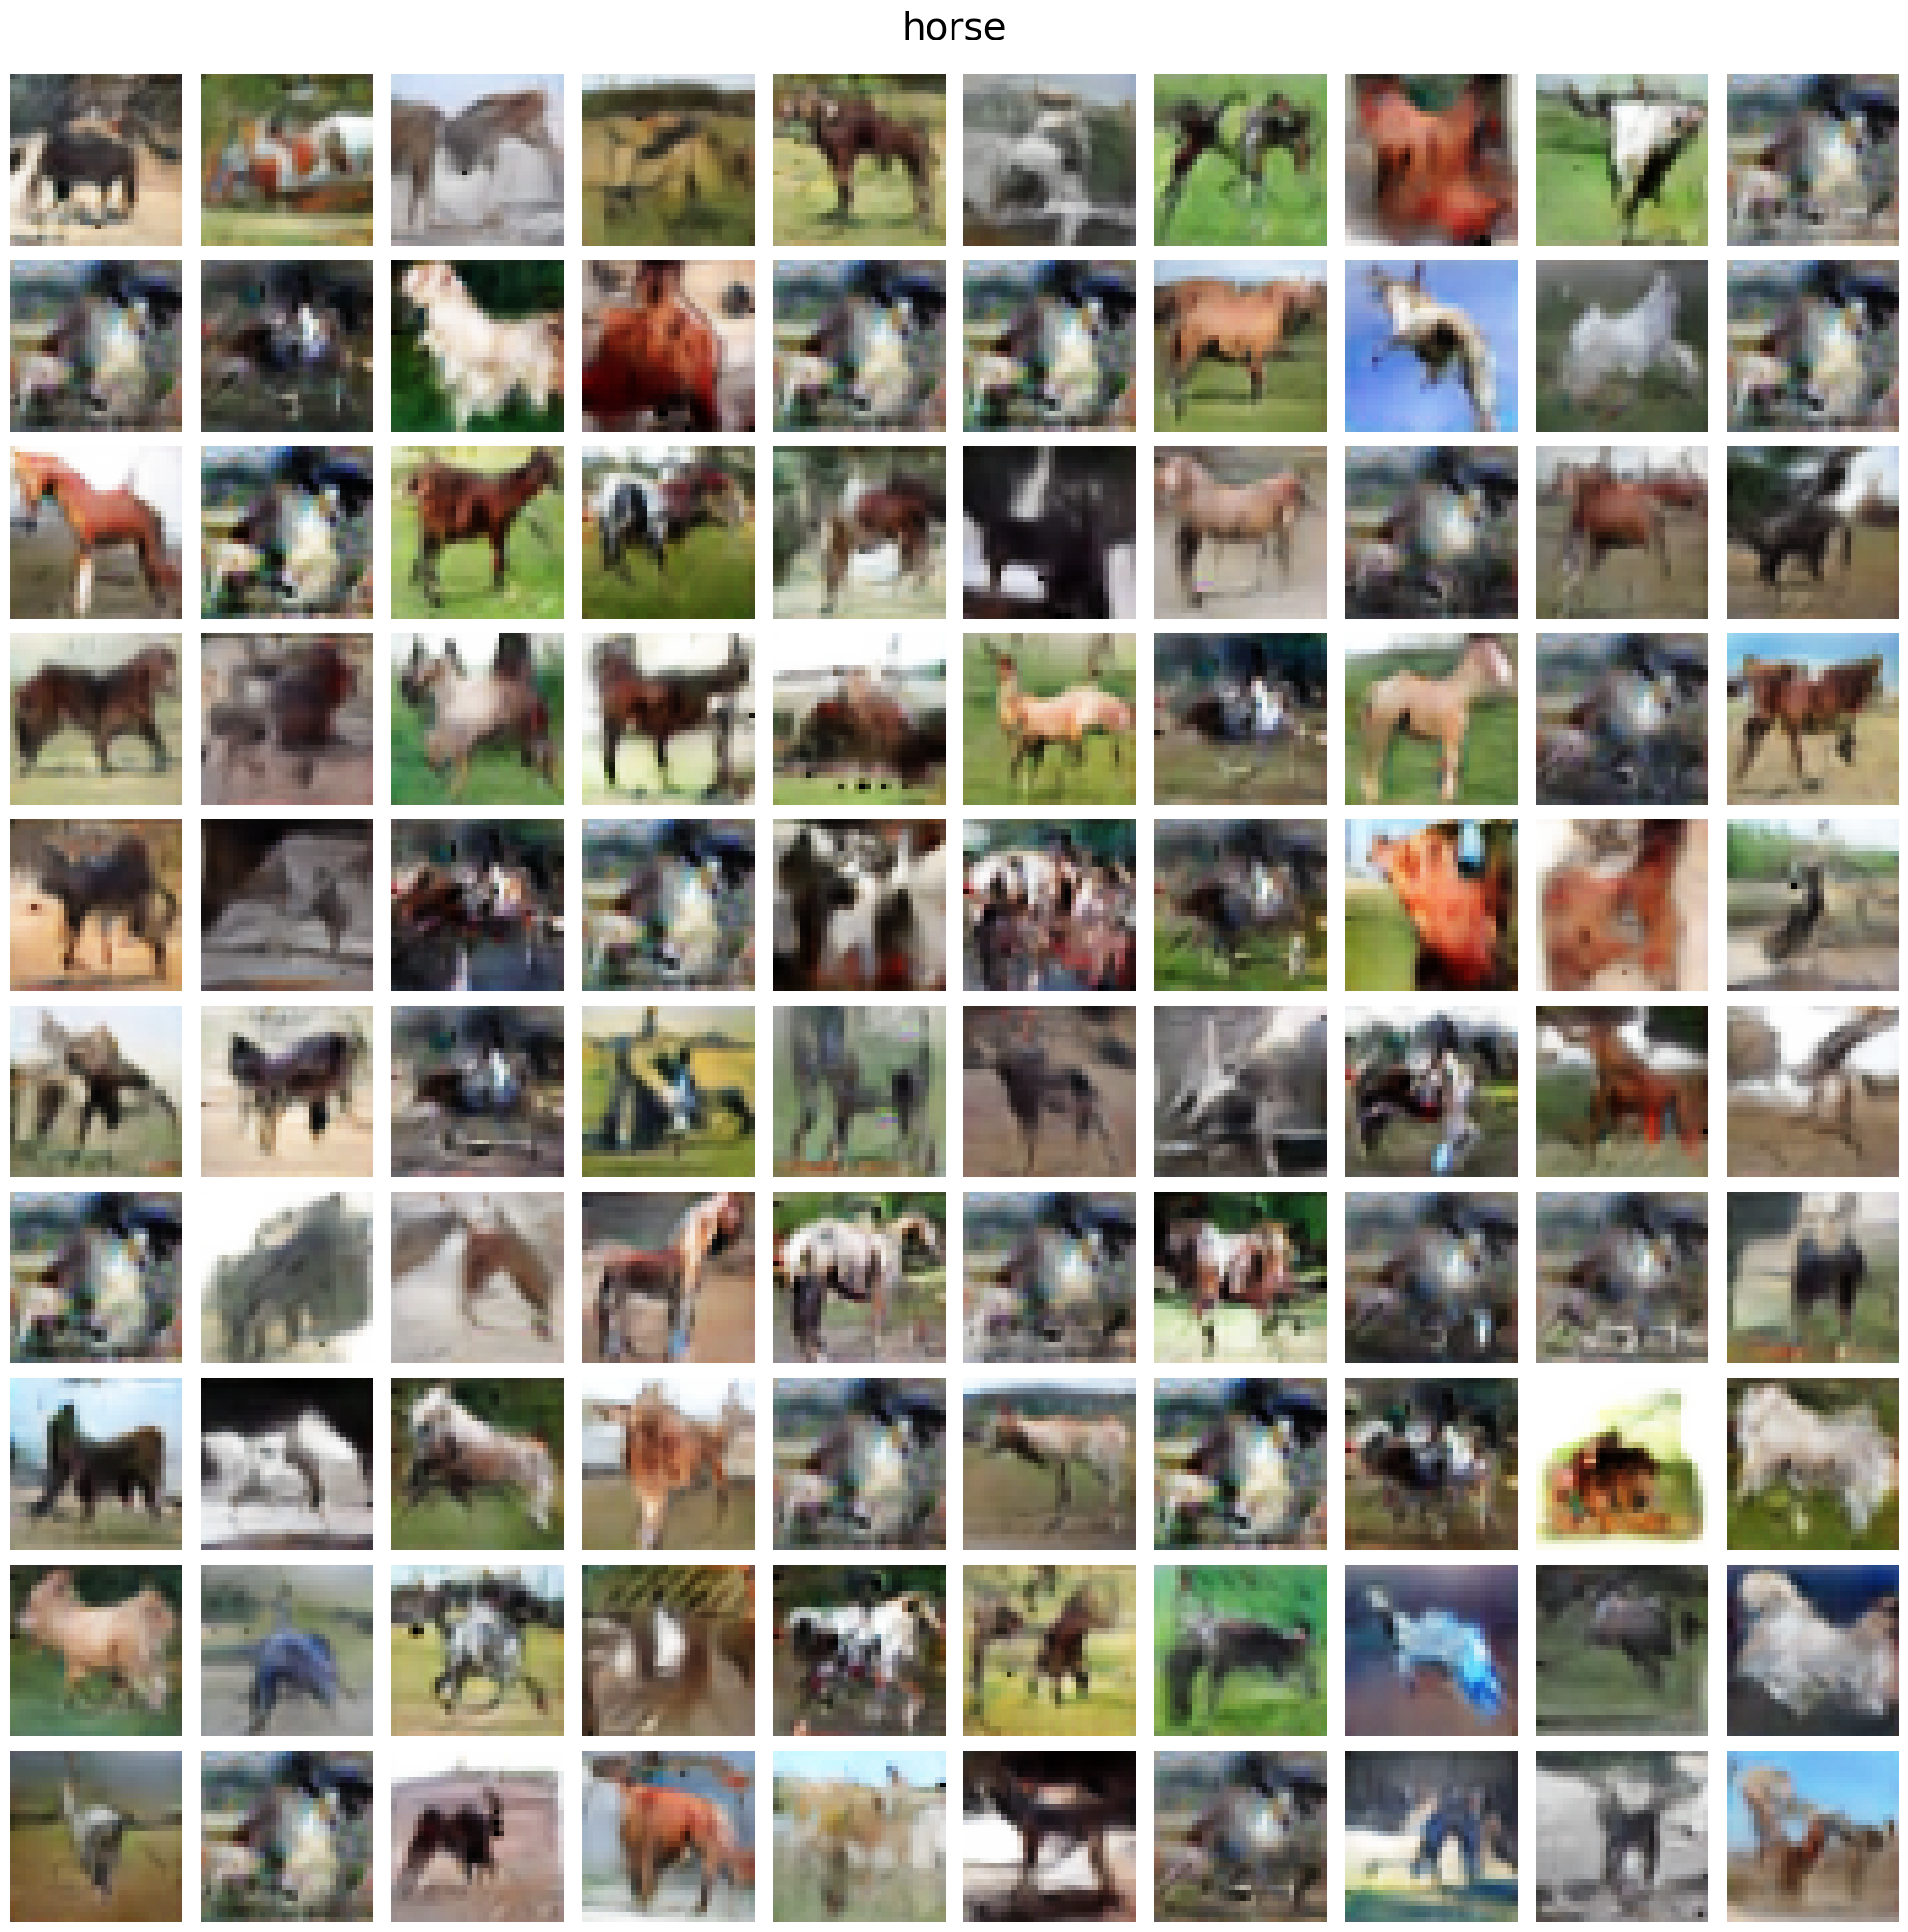

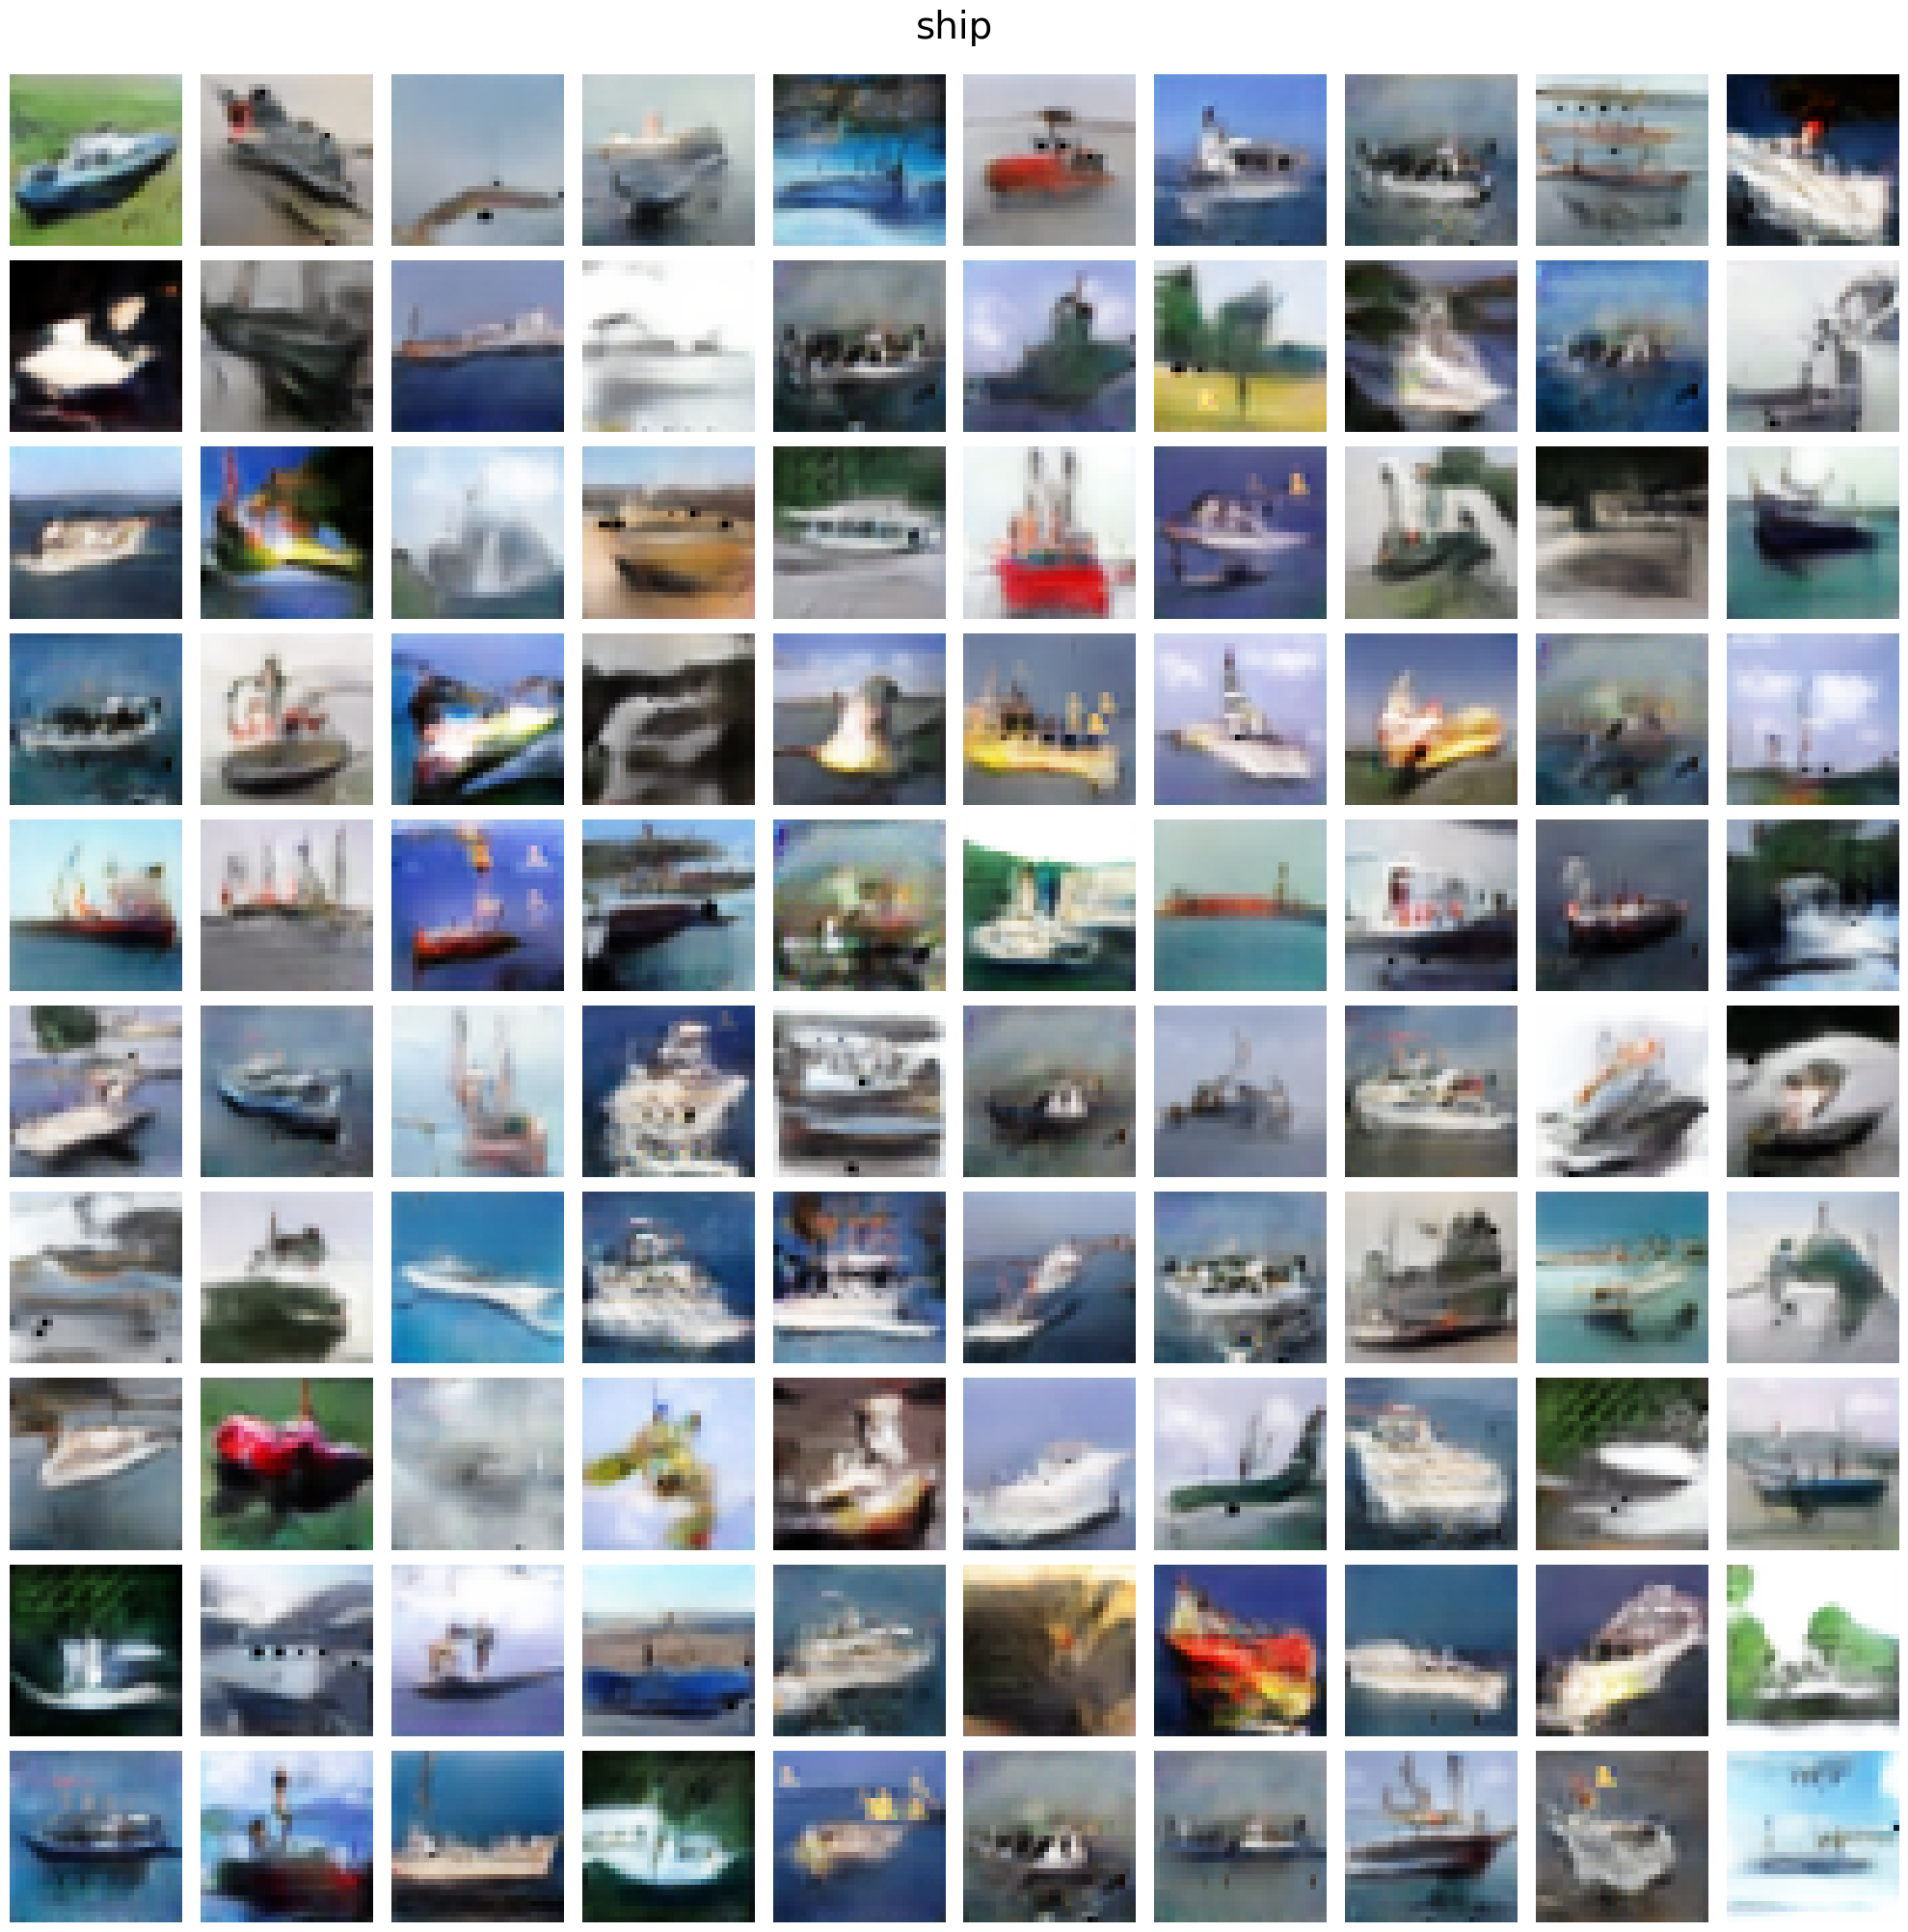

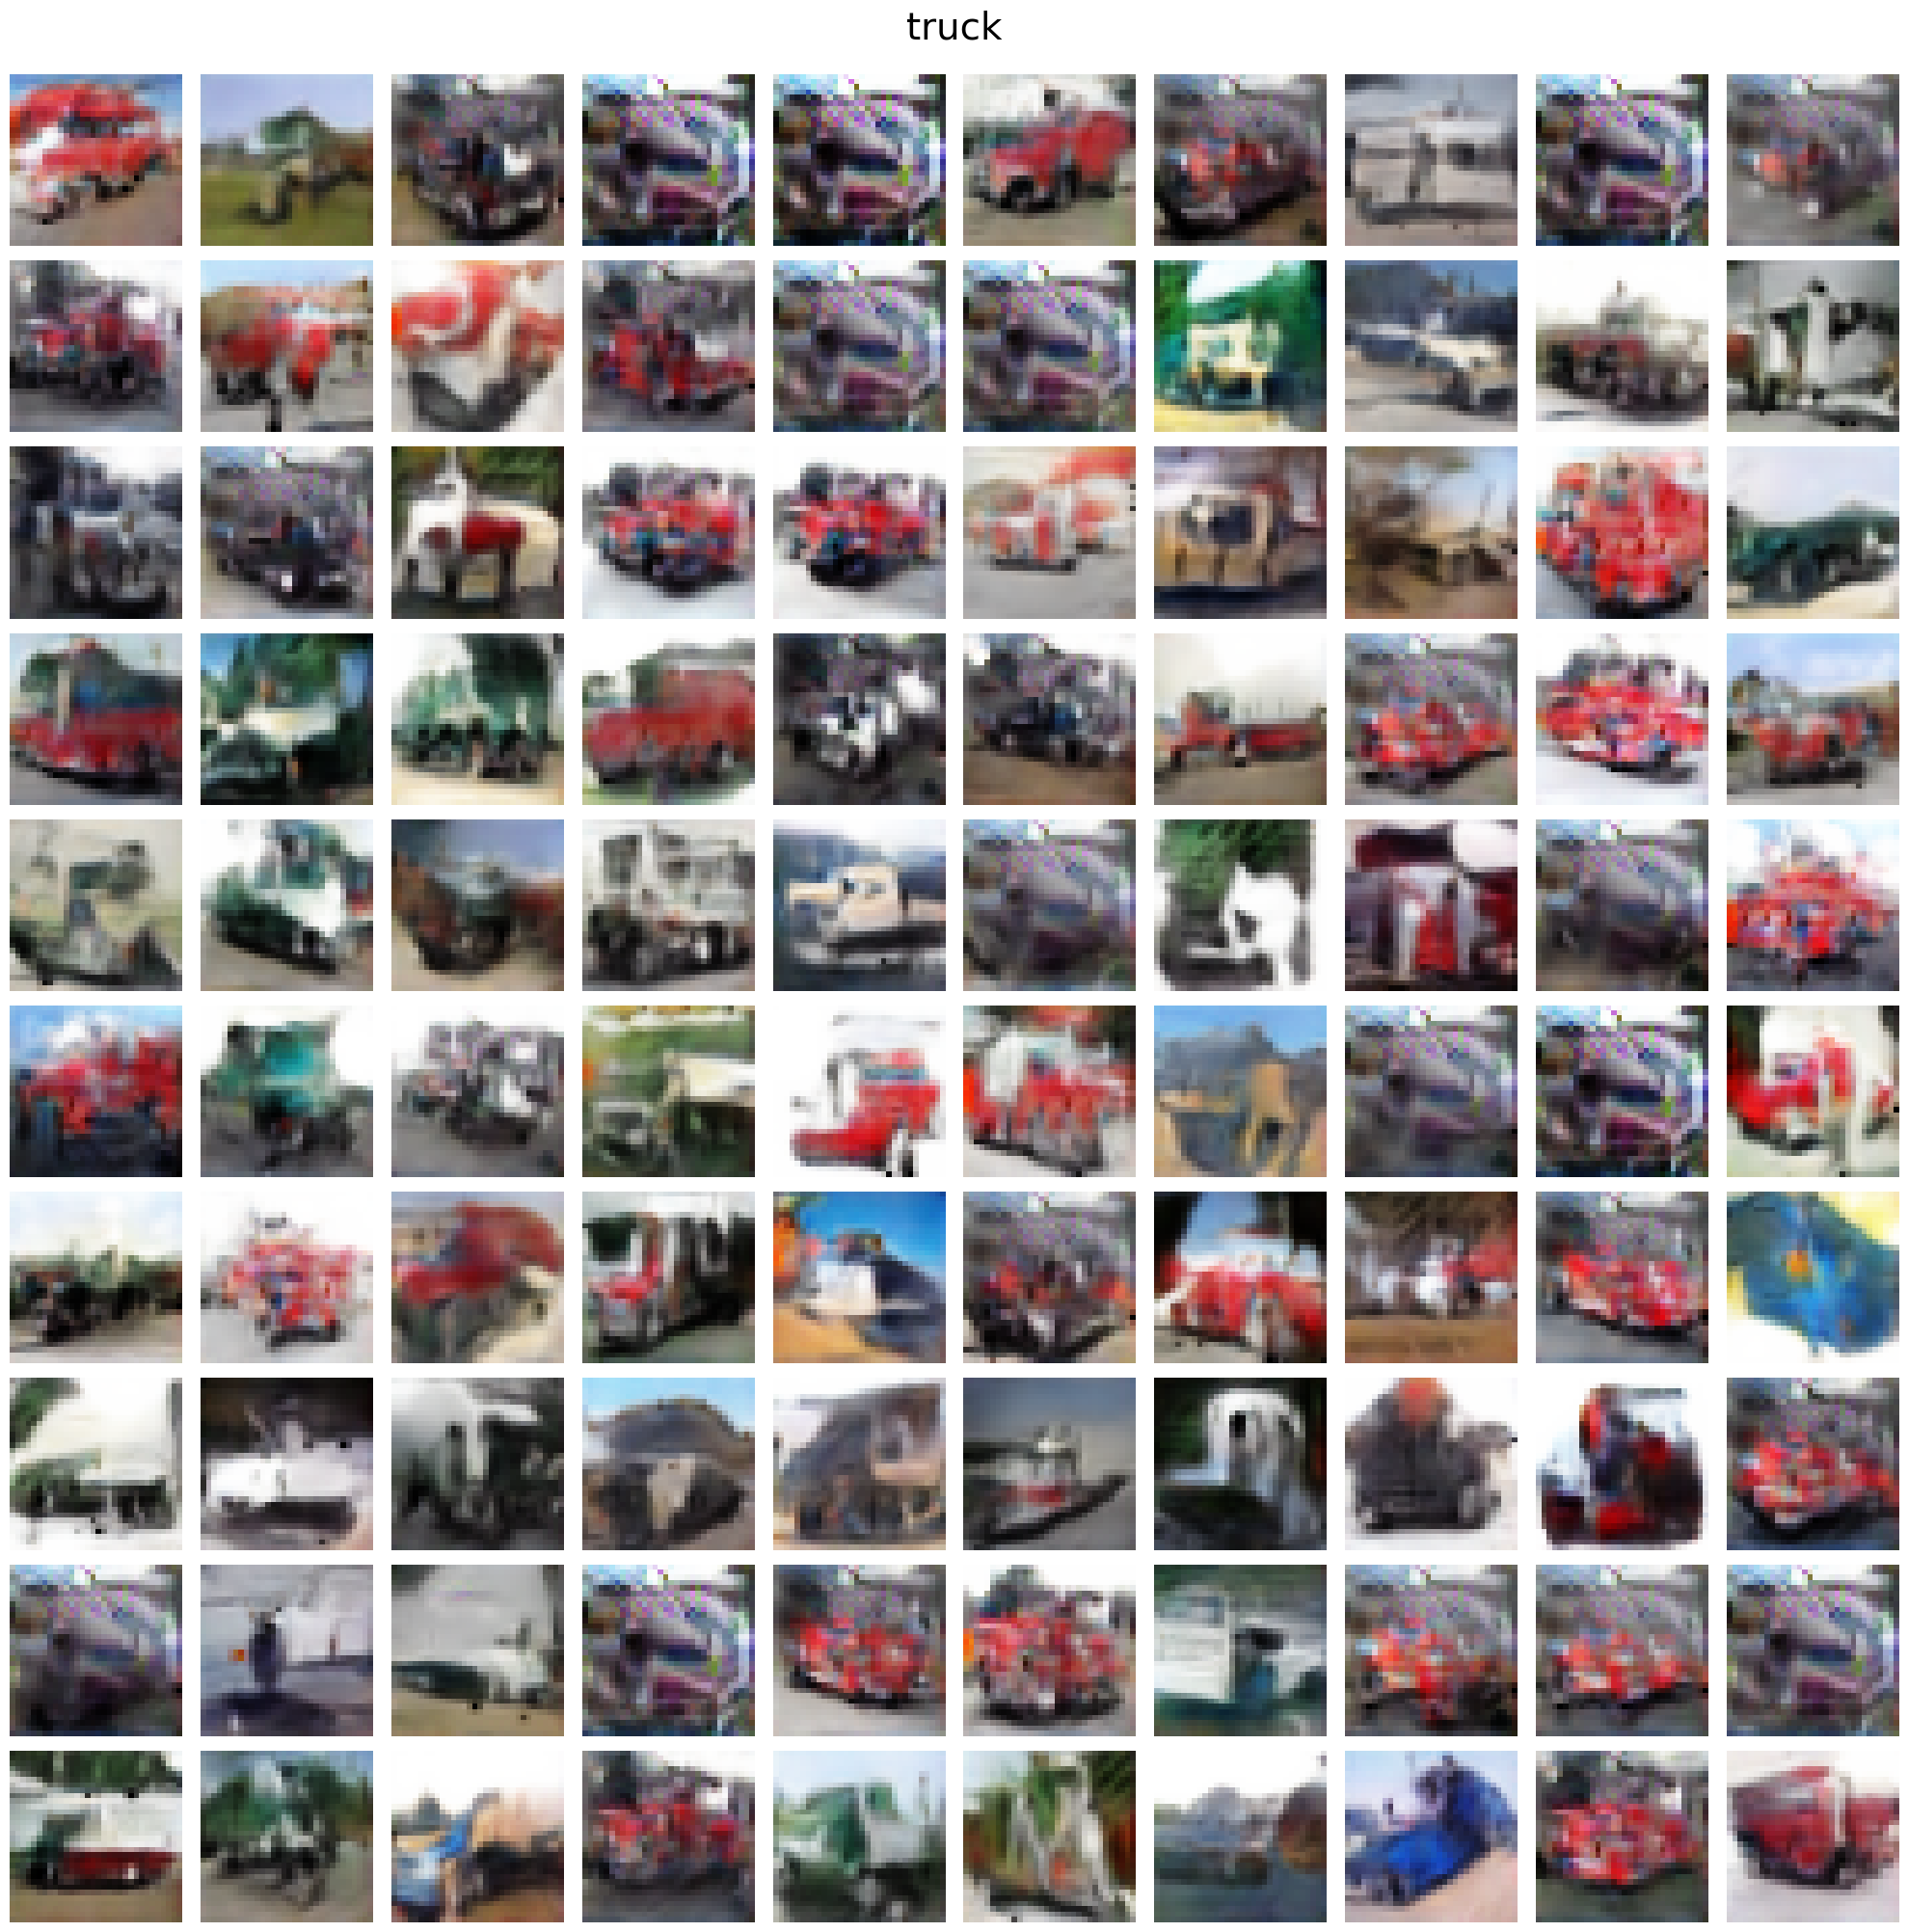

In [19]:
gan_generator = tf.keras.models.load_model('../Models/CGAN/final_SNCGAN_MODEL.h5')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    # creating conditions and noise
    conditions = np.full(100, i)
    conditions = tf.keras.utils.to_categorical(conditions, 10)
    latent_z = np.random.normal(size=(100, 128))
    noise_and_label = tf.concat([latent_z, conditions], axis=1)

    imgs = gan_generator.predict(noise_and_label,verbose=0)

    fig = plt.figure(figsize=(20, 20), tight_layout=True)
    for idx, img in enumerate(imgs):
        ax = fig.add_subplot(10, 10, idx+1)
        ax.imshow((img + 1) / 2)
        ax.axis('off')
    fig.suptitle(class_names[i], y=1, fontsize=28)
    fig.savefig(f"./GenImages/{class_names[i]}")